# Import essential libraries and Read dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
import pandas_profiling as pp

from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from scipy.stats.mstats import winsorize

import re
import pycountry
import random

c:\Users\asus\anaconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\asus\anaconda3\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\asus\AppData\Local\Temp\ipykernel_23824\529179494.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. 

In [2]:
df = pd.read_csv('./data/movie_dataset.csv')

In [3]:
df.shape

(4803, 24)

In [4]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [5]:
df.describe()

index        budget             id   popularity       revenue  \
count  4803.000000  4.803000e+03    4803.000000  4803.000000  4.803000e+03   
mean   2401.000000  2.904504e+07   57165.484281    21.492301  8.226064e+07   
std    1386.651002  4.072239e+07   88694.614033    31.816650  1.628571e+08   
min       0.000000  0.000000e+00       5.000000     0.000000  0.000000e+00   
25%    1200.500000  7.900000e+05    9014.500000     4.668070  0.000000e+00   
50%    2401.000000  1.500000e+07   14629.000000    12.921594  1.917000e+07   
75%    3601.500000  4.000000e+07   58610.500000    28.313505  9.291719e+07   
max    4802.000000  3.800000e+08  459488.000000   875.581305  2.787965e+09   

           runtime  vote_average    vote_count  
count  4801.000000   4803.000000   4803.000000  
mean    106.875859      6.092172    690.217989  
std      22.611935      1.194612   1234.585891  
min       0.000000      0.000000      0.000000  
25%      94.000000      5.600000     54.000000  
50%     103.000000      6.200000    235.000000  
75%     118.000000      6.800000    737.000000  
max     338.000000     10.000000  13752.000000

In [6]:
df.sample(5,random_state=50)

index     budget                                 genres  \
3347   3347    7000000                          Drama History   
3673   3673          0                           Comedy Drama   
301     301  102000000                  Drama Science Fiction   
1187   1187   40000000                         Thriller Drama   
1715   1715   27000000  Thriller Science Fiction Action Crime   

                                          homepage      id  \
3347  http://wip.warnerbros.com/goodnightgoodluck/    3291   
3673                   http://www.anglickykral.cz/   12555   
301              http://cloudatlas.warnerbros.com/   83542   
1187                                           NaN  296098   
1715                                           NaN    8831   

                                               keywords original_language  \
3347  telecaster communist political activism tv sho...                en   
3673  expensive restaurant luxury adolf hitler pragu...                cs   
301   clone future dystopia ensemble cast duringcred...                en   
1187                spy cia cold war soviet union pilot                en   
1715  martial arts time travel science fiction alter...                en   

                        original_title  \
3347        Good Night, and Good Luck.   
3673  Obsluhoval jsem anglického krále   
301                        Cloud Atlas   
1187                   Bridge of Spies   
1715                           Timecop   

                                               overview  popularity  ...  \
3347  The story of journalist, Edward R Murrow's sta...   17.717681  ...   
3673  Jan Dítě has been released from a Czech prison...    2.387463  ...   
301   A set of six nested stories spanning time betw...   73.872343  ...   
1187  During the Cold War, the Soviet Union captures...   48.445978  ...   
1715  An officer for a security agency that regulate...   13.308127  ...   

     runtime                                   spoken_languages    status  \
3347    93.0           [{"iso_639_1": "en", "name": "English"}]  Released   
3673   120.0  [{"iso_639_1": "pl", "name": "Polski"}, {"iso_...  Released   
301    172.0           [{"iso_639_1": "en", "name": "English"}]  Released   
1187   141.0  [{"iso_639_1": "ru", "name": "P\u0443\u0441\u0...  Released   
1715    99.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                                tagline  \
3347  They took on the Government with nothing but t...   
3673                                                NaN   
301                             Everything is Connected   
1187  In the shadow of war, one man showed the world...   
1715  They killed his wife ten years ago. There's st...   

                             title vote_average vote_count  \
3347    Good Night, and Good Luck.          6.8        273   
3673  I Served the King of England          7.0         22   
301                    Cloud Atlas          6.6       2977   
1187               Bridge of Spies          7.2       2583   
1715                       Timecop          5.5        282   

                                                   cast  \
3347  David Strathairn Jeff Daniels Alex Borstein Ro...   
3673  Ivan Barnev Old\u0159ich Kaiser Julia Jentsch ...   
301   Tom Hanks Halle Berry Jim Broadbent Hugo Weavi...   
1187  Tom Hanks Mark Rylance Amy Ryan Alan Alda Seba...   
1715  Jean-Claude Van Damme Mia Sara Ron Silver Bruc...   

                                                   crew               director  
3347  [{'name': 'George Clooney', 'gender': 2, 'depa...         George Clooney  
3673  [{'name': 'Ji\\u0159\\u00ed Menzel', 'gender':...  Ji\u0159\u00ed Menzel  
301   [{'name': 'Lucinda Syson', 'gender': 1, 'depar...             Tom Tykwer  
1187  [{'name': 'Thomas Newman', 'gender': 2, 'depar...       Steven Spielberg  
1715  [{'name': 'Mark Isham', 'gender': 2, 'departme...            Peter Hyams  

[5 rows x 24 columns]

In [7]:
# report = pp.ProfileReport(df)
# report.to_file('./report/report.html')

# Data info and change type of columns if they need to be changed and Drop unnecessary columns and rename certain columns as required

#### 1. Data info and change type of columns if they need to be changed

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [9]:
df.original_language=df.original_language.astype('string')
df.director=df.director.astype('string')
df.release_date=pd.to_datetime(df['release_date']).dt.year
df.title=df.title.astype('string')

In [10]:
def getName(data):
    company_list = []
    data = eval(data)
    for i in data:
        company_list.append(i['name'])
    return  np.array(company_list)

df.production_companies=df.production_companies.apply(getName)
df.crew=df.crew.apply(getName)

In [11]:
def countryName(data):
    country_list = []
    data = eval(data)
    for i in data:
        country_list.append(i['iso_3166_1'].lower())
    return  np.array(country_list)
df.production_countries=df.production_countries.apply(countryName)

In [12]:
df['genres'] = df.genres.apply(lambda genres: genres.lower().split(' ') if isinstance(genres, str) else [])

In [13]:
def castNames(cast):
   if type(cast) != str:
      return []
   
   names = list()
   cast = cast.split(' ')
   
   num =len(cast)
   i=0
   while i+2< num:
      names.append(cast[i].lower()+" "+cast[i+1].lower())
      i+=2
   return names
      
       
df.cast=df.cast.apply(castNames)

In [14]:
pattern = r'.*[0-9/\\].*'

df.director = df.director.apply(lambda director: director.encode('latin-1').decode('unicode_escape') 
                if pd.notna(director) and re.match(pattern, director) else director)
df.cast = df.cast.apply( lambda cast: [ name.encode('latin-1').decode('unicode_escape') 
        if (pd.notna(name) and re.match(pattern, name)) else name for name in cast ])


In [15]:
df.isna().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                  30
dtype: int64

### 2. Drop unnecessary columns and rename certain columns as required

In [16]:
df.groupby('status')['index'].count()

status
Post Production       3
Released           4795
Rumored               5
Name: index, dtype: int64

In [17]:
df= df[(df.status != 'Rumored') | (df.status != 'Post Production')]

In [18]:
duplicated=df.duplicated(subset={ 'budget', 'id',
       'original_language', 'original_title', 'popularity', 'release_date',
       'revenue', 'runtime', 'status', 'title',
       'vote_average', 'vote_count'}).sum()

print(f"Number of duplicated rows : {duplicated}")

Number of duplicated rows : 0


In [19]:
df.drop(columns=['index','homepage','keywords','original_title','overview','spoken_languages','tagline','status','id'],inplace=True)

In [20]:
df.rename(columns={'original_language':'language','production_companies':'companies'
                   ,'production_countries':'countries'},inplace=True)

### 3. checking the Result

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4803 non-null   int64  
 1   genres        4803 non-null   object 
 2   language      4803 non-null   string 
 3   popularity    4803 non-null   float64
 4   companies     4803 non-null   object 
 5   countries     4803 non-null   object 
 6   release_date  4802 non-null   float64
 7   revenue       4803 non-null   int64  
 8   runtime       4801 non-null   float64
 9   title         4803 non-null   string 
 10  vote_average  4803 non-null   float64
 11  vote_count    4803 non-null   int64  
 12  cast          4803 non-null   object 
 13  crew          4803 non-null   object 
 14  director      4773 non-null   object 
dtypes: float64(4), int64(3), object(6), string(2)
memory usage: 600.4+ KB


# Missing and Null values

In [22]:
df.describe()

budget   popularity  release_date       revenue      runtime  \
count  4.803000e+03  4803.000000   4802.000000  4.803000e+03  4801.000000   
mean   2.904504e+07    21.492301   2002.468763  8.226064e+07   106.875859   
std    4.072239e+07    31.816650     12.414354  1.628571e+08    22.611935   
min    0.000000e+00     0.000000   1916.000000  0.000000e+00     0.000000   
25%    7.900000e+05     4.668070   1999.000000  0.000000e+00    94.000000   
50%    1.500000e+07    12.921594   2005.000000  1.917000e+07   103.000000   
75%    4.000000e+07    28.313505   2011.000000  9.291719e+07   118.000000   
max    3.800000e+08   875.581305   2017.000000  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4803.000000   4803.000000  
mean       6.092172    690.217989  
std        1.194612   1234.585891  
min        0.000000      0.000000  
25%        5.600000     54.000000  
50%        6.200000    235.000000  
75%        6.800000    737.000000  
max       10.000000  13752.000000

### 1. Checking and Dropping rows without genres and cast 

In [23]:
withoutCast = df[df['cast'].apply(lambda x: len(x) == 0)].index
withoutGenres = df[df['genres'].apply(lambda x: len(x) == 0)].index
withoutProductionCompanies = df[df['companies'].apply(lambda x: len(x) == 0)].index
print('without Cast:',len(withoutCast),
      '\nwitout Genres:',len(withoutGenres),
      '\nwithout Production Companies:',
      len(withoutProductionCompanies))

rows_to_drop = np.union1d(np.union1d(withoutCast,withoutGenres),withoutProductionCompanies) 
print(f"total row to drop {len(rows_to_drop)}")

without Cast: 52 
witout Genres: 28 
without Production Companies: 351
total row to drop 364


In [24]:
df.drop(rows_to_drop, inplace=True)

In [25]:
# withoutCast = df[df['cast'].apply(lambda x: len(x) == 0)].index
# withoutGenres = df[df['genres'].apply(lambda x: len(x) == 0)].index
# withoutProductionCompanies = df[df['companies'].apply(lambda x: len(x) == 0)].index
# print('without Cast:',len(withoutCast),
#       '\nwitout Genres:',len(withoutGenres),
#       '\nwithout Production Companies:',len(withoutProductionCompanies))


# rows_to_drop = np.union1d(withoutCast,withoutGenres) 
# print("We do not drop columns without companies just yet. (:", f"total row to drop {len(rows_to_drop)}", sep='\n')

### 2. Dropping rows without director

In [26]:
df.dropna(subset=['director'],inplace=True)

### 3. Checking zero values and change them to nan

In [27]:
for i in df.columns[[0,3,6,7,8,11,10]]:
    percentage = "{:.2f}".format(len(df[df[i] == 0]) / df.shape[0] * 100)
    print(i, ':', percentage, "%")
withoutProductionCompanies = df[df['companies'].apply(lambda x: len(x) == 0)].index
withoutProductionCountries = df[df['countries'].apply(lambda x: len(x) == 0)].index

budget : 17.29 %
popularity : 0.00 %
release_date : 0.00 %
revenue : 25.11 %
runtime : 0.11 %
vote_count : 0.45 %
vote_average : 0.45 %


In [28]:
df.runtime.replace(0,np.nan,inplace=True)
df.budget.replace(0,np.nan,inplace=True)
df.revenue.replace(0,np.nan,inplace=True)
df.vote_average.replace(0,np.nan,inplace=True)
df.vote_count.replace(0,np.nan,inplace=True)

Based on real-world records, the movie "Prime" holds the record for the lowest budget, with a total budget of **$7,000** and the movie "Zyzzyx Road" holds the record for the lowest revenue, with a total revenue of **$30**. Any budget or revenue below these amounts is considered as **nan** .

In [29]:
df.loc[df['budget'] < 7000, 'budget'] = np.nan
df.loc[df['revenue'] < 30, 'revenue'] = np.nan

### 4.Dropping rows with more than 3 nan (budget, revenue, vote_average, vote_count)

In [30]:
df.dropna(thresh=len(df.columns) - 3 , inplace=True)

### 5. Implementing KNN Imputer for numerical Null

In [31]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer


df_copy = df[df.columns[[0, 3, 6, 7, 8, 10, 11]]].copy()
imputer = IterativeImputer(random_state=0,max_iter=int(np.sqrt(df.shape[0])))
imputed = imputer.fit_transform(df_copy)
df[df.columns[[0, 3, 6, 7, 8, 10, 11]]] = imputed

In [32]:
# df_copy = df[df.columns[[0,3,6,7,8,10,11]]].copy()
# imputer = KNNImputer(n_neighbors=int(np.sqrt(df.shape[0])))
# imputed = imputer.fit_transform(df_copy)
# df[df.columns[[0,3,6,7,8,10,11]]] = imputed

In [33]:
df.release_date = df.release_date.astype('int16')

### 6. Checking the Result

In [34]:
df.isna().sum()

budget          0
genres          0
language        0
popularity      0
companies       0
countries       0
release_date    0
revenue         0
runtime         0
title           0
vote_average    0
vote_count      0
cast            0
crew            0
director        0
dtype: int64

In [35]:
df.describe()

budget   popularity  release_date       revenue      runtime  \
count  4.420000e+03  4420.000000   4420.000000  4.420000e+03  4420.000000   
mean   3.758962e+07    23.222121   2002.156109  1.104937e+08   108.381393   
std    3.906112e+07    32.587295     12.690016  1.622670e+08    20.601512   
min    7.000000e+03     0.001586   1916.000000 -1.321950e+06    14.000000   
25%    1.200000e+07     6.249024   1999.000000  1.943513e+07    95.000000   
50%    3.000000e+07    14.747088   2005.000000  6.870350e+07   105.000000   
75%    4.200000e+07    30.016746   2010.000000  1.104937e+08   118.000000   
max    3.800000e+08   875.581305   2016.000000  2.787965e+09   338.000000   

       vote_average    vote_count  
count   4420.000000   4420.000000  
mean       6.207300    748.604210  
std        0.930686   1270.196870  
min        1.000000    -66.905314  
25%        5.700000     80.000000  
50%        6.300000    285.000000  
75%        6.800000    826.000000  
max       10.000000  13752.000000

# Outliers

#### Setting some functioons

In [36]:
def outlier_diff(df,li):
    for col in df.columns[li]:
        Q1 , Q3 = df[col].quantile(.25) , df[col].quantile(.75)
        IQR = Q3 - Q1

        min_val = Q1 - (IQR*1.5)
        max_val = Q3 + (IQR*1.5)


        lower_limit = abs(min_val) / (abs(min_val) + abs(max_val))
        upper_limit = abs(max_val) / (abs(min_val) + abs(max_val))

        print("{} :\toutliers count : {} \tpercentage : {}".format (col,
            len((np.where((df[col] > max_val) | (df[col] < min_val))[0])),
            len((np.where((df[col] > max_val) | (df[col] < min_val))[0]))*100/df.shape[0]))
        #print(f"The lower outlier threshold :{lower_limit} \nThe upper outlier threshold :{upper_limit}")
        print('---------------------------------------------')

In [37]:
sns.set_theme(style='darkgrid')
def generate_random_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

In [38]:
def box_plot(df, columns ):
    colors = [generate_random_color() for _ in range(len(columns))]
    fig , ax = plt.subplots(1,len(columns),figsize=(18, 7))

    for i in range(len(columns)):
        sns.boxplot(data=df, y=df.columns[columns[i]], color=colors[i] , ax=ax[i])
        
    plt.tight_layout() 
    plt.show()


In [39]:
def heatmap(corr_matrix,color):
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.heatmap(corr_matrix, annot=True, cmap=color, linewidths=0.5, ax=ax)

    ax.set_title('Actors correlation ', fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
    
    plt.show()

### 1. Finding  outlier

In [40]:
outlier_diff(df,[0,3,7,8,10,11])

budget :	outliers count : 386 	percentage : 8.733031674208144
---------------------------------------------
popularity :	outliers count : 259 	percentage : 5.85972850678733
---------------------------------------------
revenue :	outliers count : 440 	percentage : 9.95475113122172
---------------------------------------------
runtime :	outliers count : 160 	percentage : 3.6199095022624435
---------------------------------------------
vote_average :	outliers count : 94 	percentage : 2.1266968325791855
---------------------------------------------
vote_count :	outliers count : 449 	percentage : 10.158371040723981
---------------------------------------------


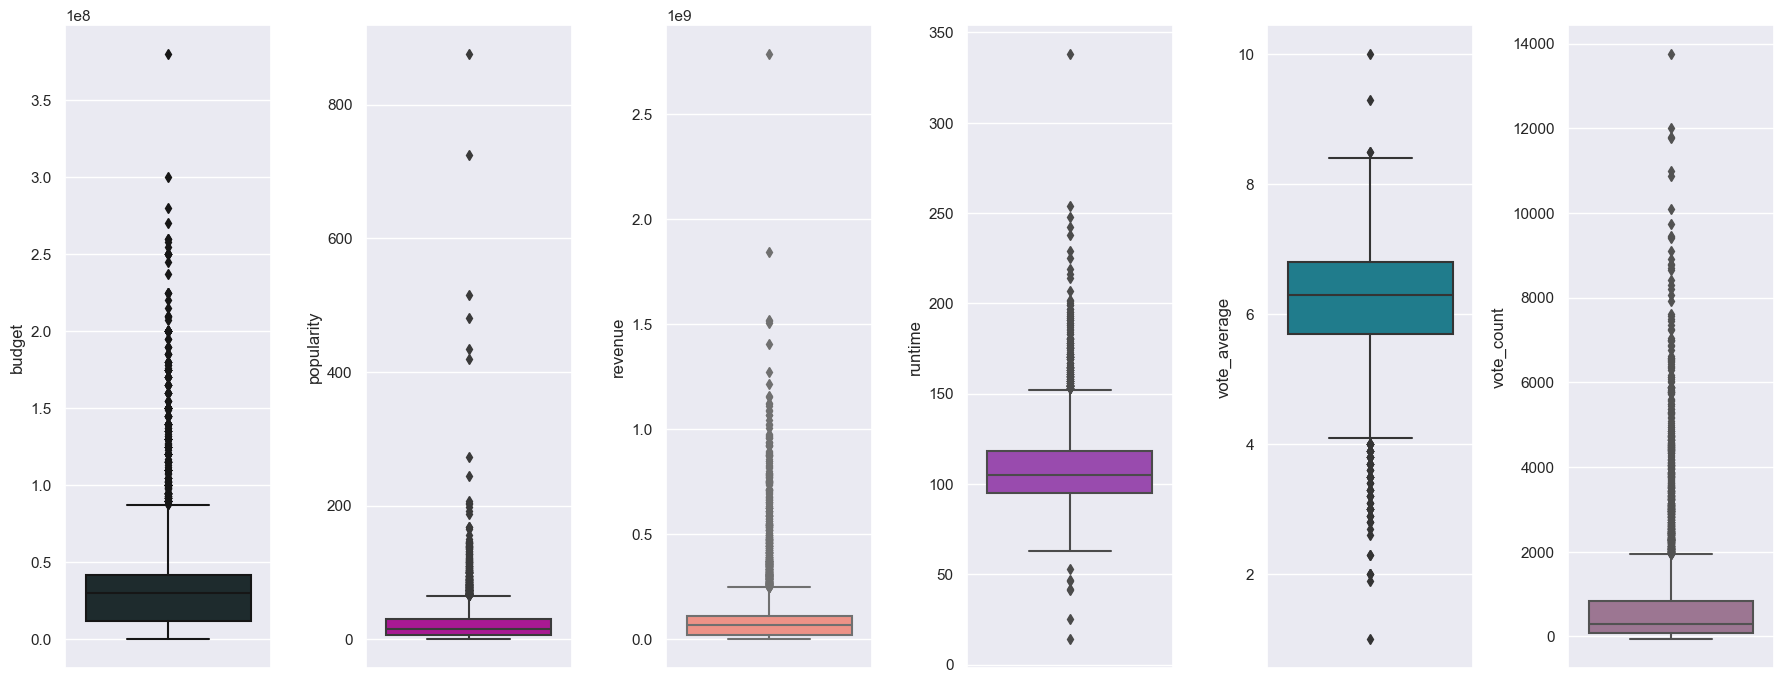

In [41]:
box_plot(df, [0, 3, 7, 8, 10, 11])

### 2. winsorize some outlier

In [42]:
winsorize_df = df.copy()
winsorize(winsorize_df['budget'],limits=(0,.002),inplace=True)
winsorize(winsorize_df['revenue'],limits=(0,.0015),inplace=True)
winsorize(winsorize_df['vote_count'],limits=(0,.0015),inplace=True)
winsorize(winsorize_df['popularity'],limits=(0,.0025),inplace=True);

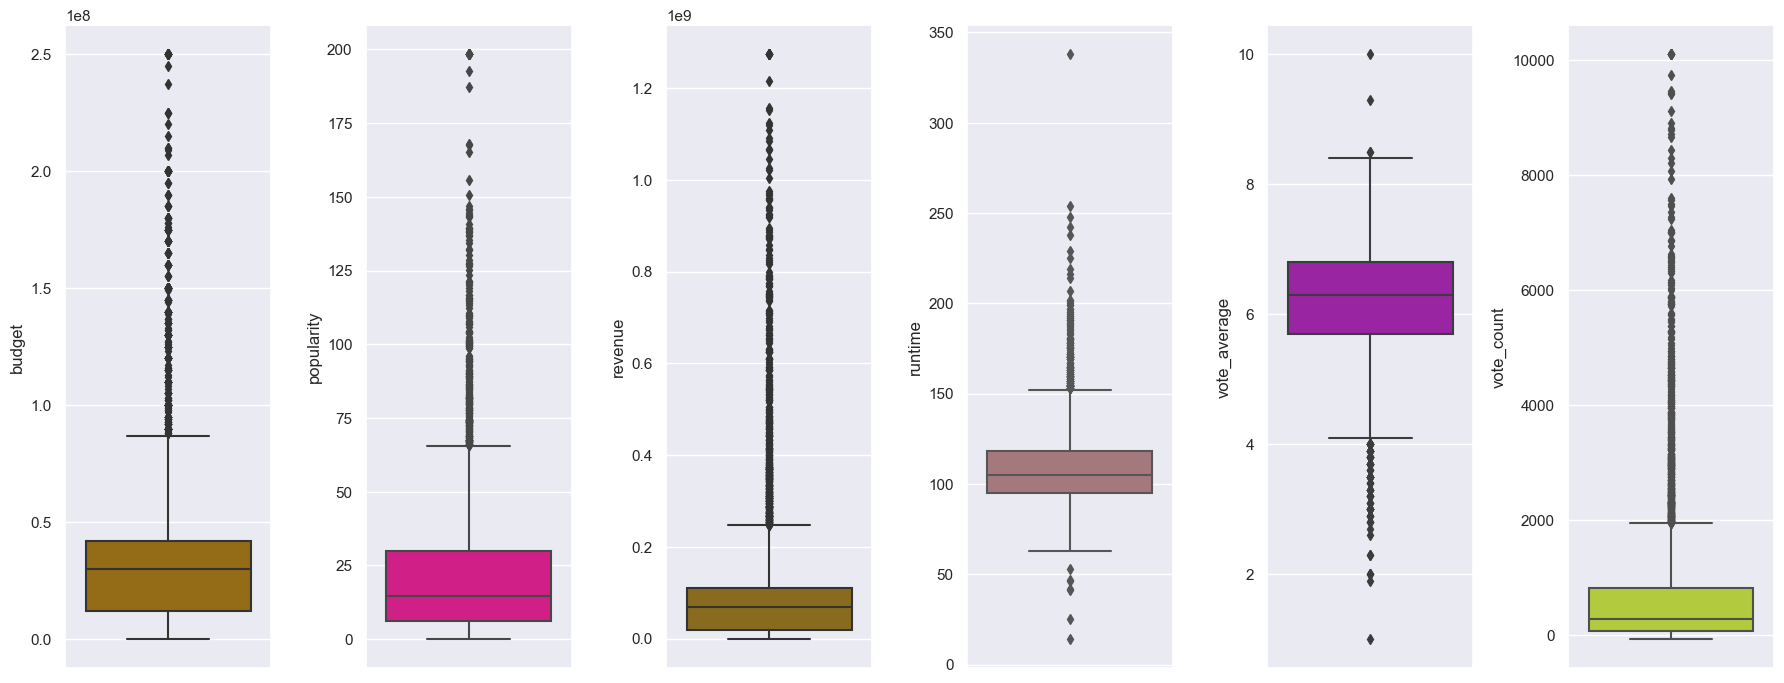

In [43]:
box_plot(winsorize_df, [0, 3, 7, 8, 10, 11])

In [44]:
df = winsorize_df.copy()

### 3. Draw heatmap

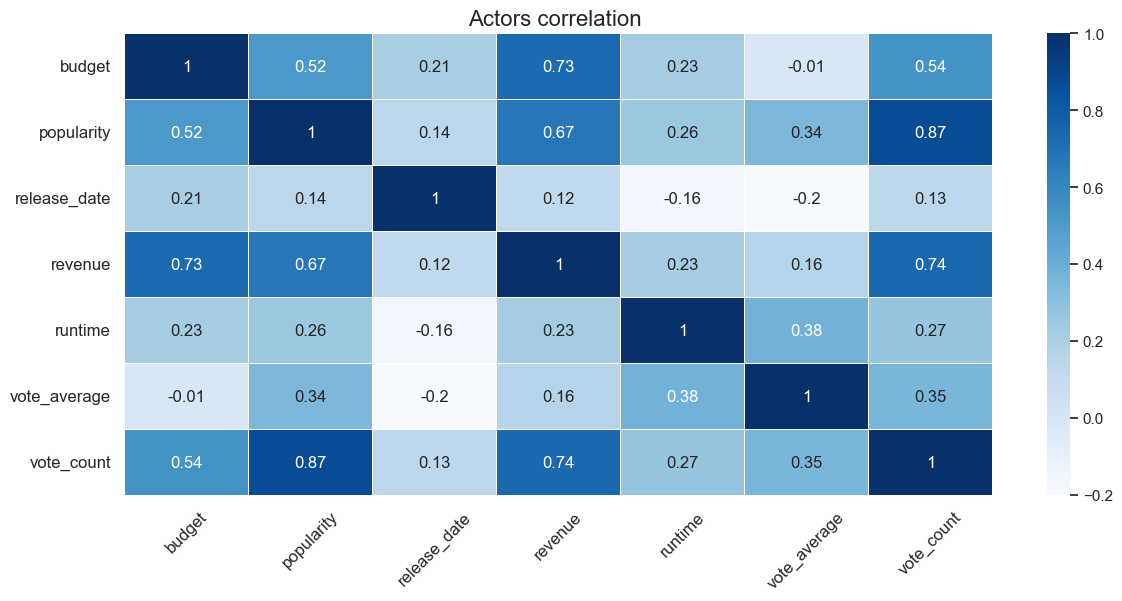

In [45]:
correlation_matrix = df.corr()

heatmap(correlation_matrix,'Blues')

# Feature Extraction

### 1. Calculate ROI of each movie 

Return on Investment (ROI) is a financial metric used to evaluate the profitability of an investment.  
It measures the return or profit generated from an investment relative to its cost. ROI is typically expressed as a percentage.  
The formula for calculating ROI is:

$$ \text{ROI} = \frac{\text{Net Return on Investment}}{\text{Cost of Investment}} \times 100 $$

In [46]:
df['ROI']= (df.revenue - df.budget)/df.budget * 100

<Axes: xlabel='ROI'>

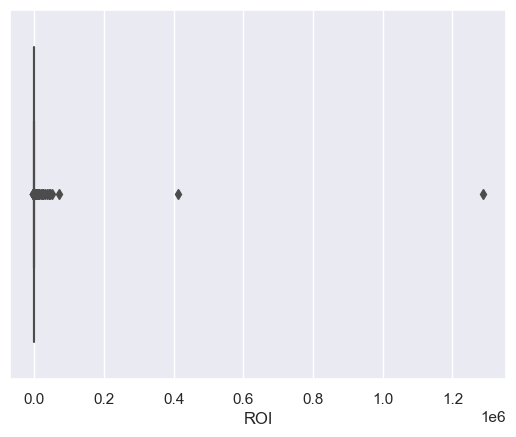

In [47]:
sns.boxplot(df,x='ROI')

### 2. Calculate rate of each film based on imdb weighted average rating formula

The IMDb (Internet Movie Database) weighted rating formula is used to calculate the weighted average rating of a movie or TV show on the IMDb website.
the key aspects typically considered in the IMDb Rating Formula:  
- Vote Average (R): The average rating given by users to a movie.
- Vote Count (v): The number of votes received by a movie.
- Average Rating (C): The average rating across all movies on IMDb.
- Minimum Votes (m): A threshold value representing the minimum number of votes required for a movie to be eligible for consideration in the ratings calculation. This helps ensure that movies with only a few votes do not have an excessive influence on the ratings.  

The formula for calculating the weighted rating is as follows:


$$ \text {Weighted Rating (WR)} = \left ( \frac{v}{{v + m}} \right) \times R + \left( \frac{m}{{v + m}} \right) \times C $$

In [48]:
v = df['vote_count']
R = df['vote_average']
C = df['vote_average'].mean()
m = df['vote_count'].quantile(0.8)   

df['rating'] = (v/(v+m) * R) + (m/(m+v) * C)

df.drop(columns=['vote_count','vote_average'],inplace=True)

### 3. check heatmap and draw box plot

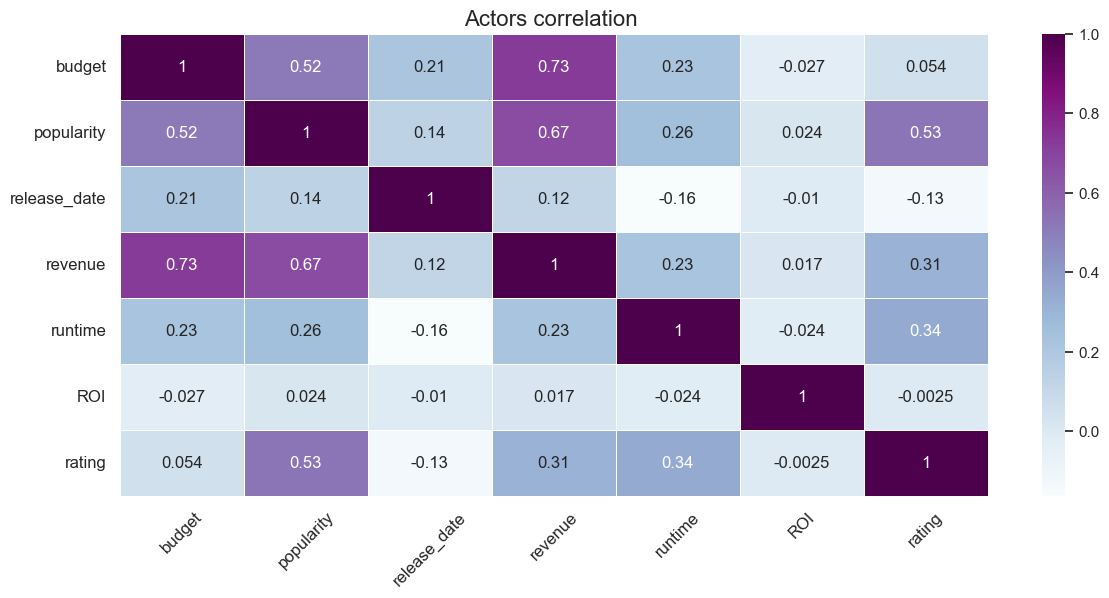

In [49]:
correlation_matrix = df.corr()
heatmap(correlation_matrix,'BuPu')

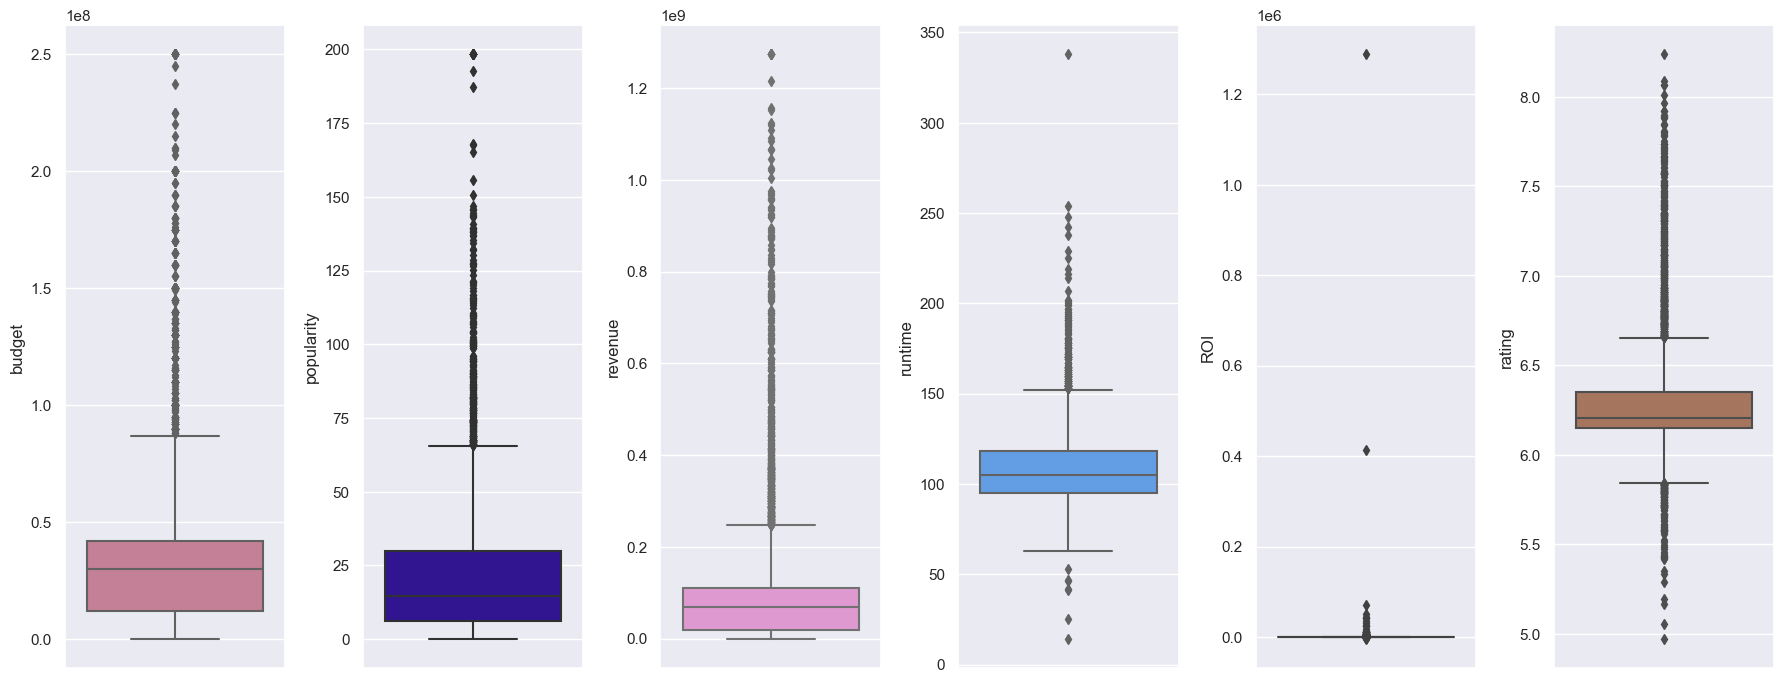

In [50]:
box_plot(df,[0, 3, 7, 8, 13 ,14])

##### Note: Perhaps we can consider adding a success score at a later stage.

### 4. Building Report

In [51]:
# report = pp.ProfileReport(df)
# report.to_file('./report/result_report.html')

# Questions


### 1. In which genres are films generally made? 

In [52]:
genre_df = df.explode('genres')[['genres']] 
most_made_genre = genre_df.groupby('genres')['genres'].count().sort_values(ascending=False)[:10]

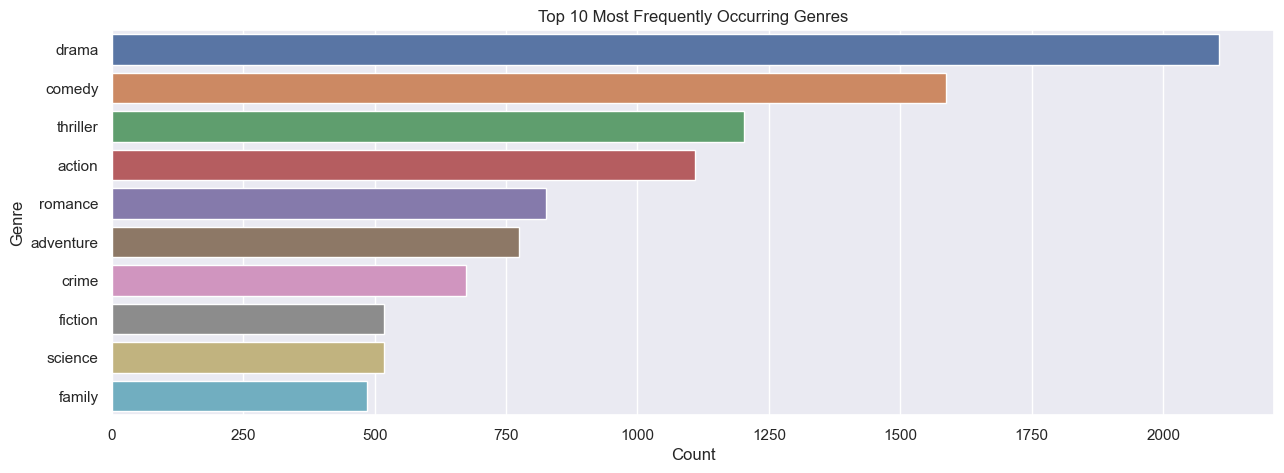

In [53]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y=most_made_genre.index, x=most_made_genre.values, ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
ax.set_title('Top 10 Most Frequently Occurring Genres');

### 2. What does the success of the film mean? Ratings or sales or...? 

#### Calculating success score

First, let's explore whether there is any correlation between popularity, ROI, and rating.

In [54]:
corr = df.corr()
corr_ROI_and_popularity =corr.loc['popularity','ROI']
corr_Rating_and_popularity =corr.loc['popularity','rating']
corr_Rating_and_ROI =corr.loc['rating','ROI']
print(f"Correlation between ROI and Popularity is: {corr_ROI_and_popularity}\n"
      f"Correlation between Rating and Popularity is: {corr_Rating_and_popularity}\n"
      f"Correlation between Rating and ROI is: {corr_Rating_and_ROI}")

Correlation between ROI and Popularity is: 0.023856479542392152
Correlation between Rating and Popularity is: 0.5310424543416936
Correlation between Rating and ROI is: -0.002478832025704532


We will normalize these variables and then calculate the sum of their coefficients, considering that there is no concrete correlation between them. **As we are not experts** in the movie industry and lack strong knowledge of machine learning, we will assign **equal weights** to them.

In [55]:
scale = MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0, 10))

norm_popularity = scale.fit_transform(df[['popularity']])
norm_rating = scale.fit_transform(df[['rating']])
norm_ROI = scale.fit_transform(df[['ROI']])

equal_weight = 1/3
df['score'] = scaler.fit_transform((.3 * norm_popularity) + (.4 * norm_rating) + (.3 * norm_ROI) )

In [56]:
successful_movies_df = df.sort_values(by='score',ascending=False).head(50)[['title','rating','popularity','ROI','score']].reset_index(drop=True)
successful_movies_df.to_csv('./data/successful movies.csv')

#### Draw plots

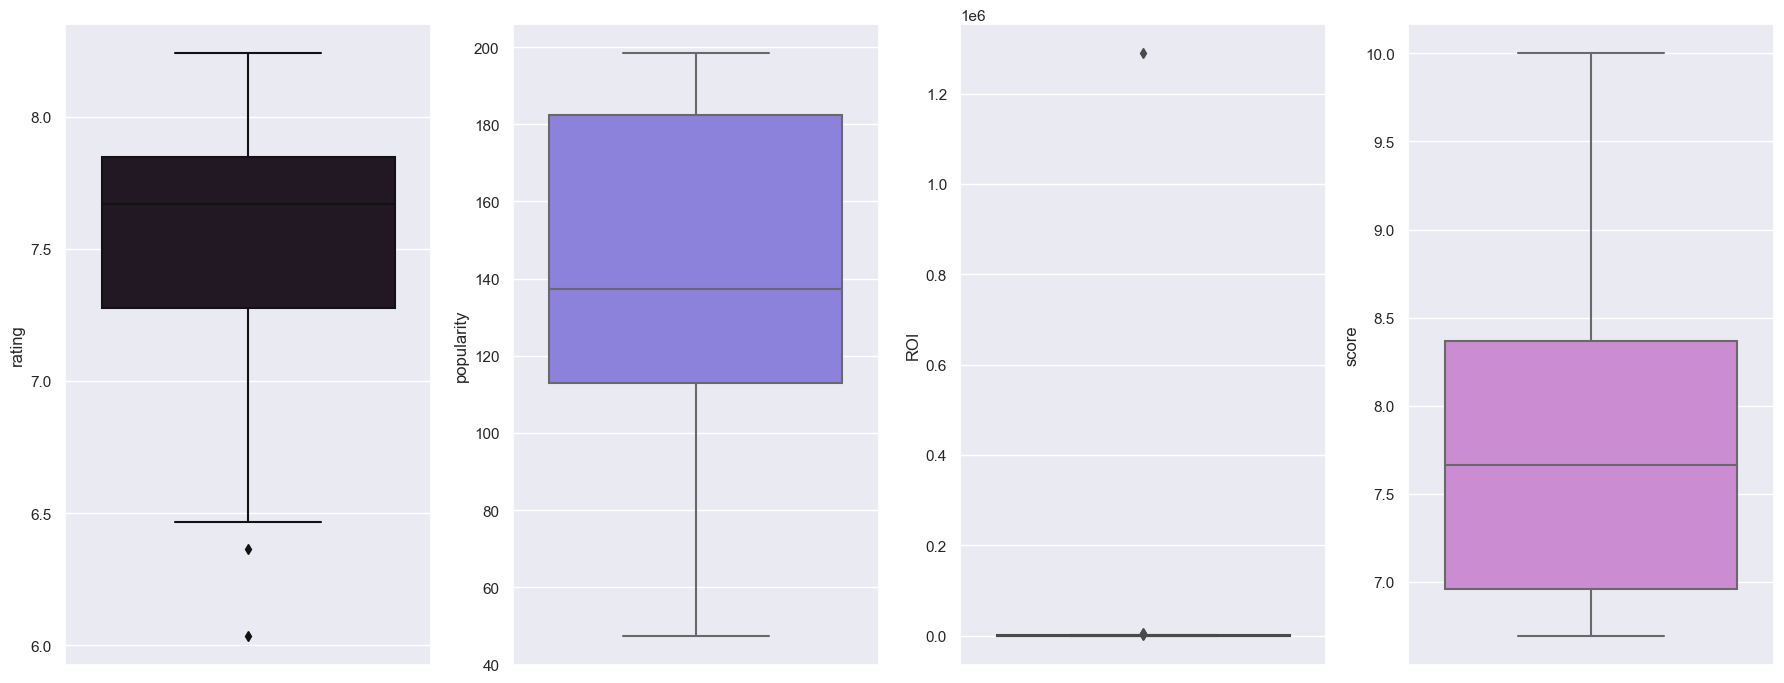

In [57]:
box_plot(successful_movies_df,[1,2,3,4])

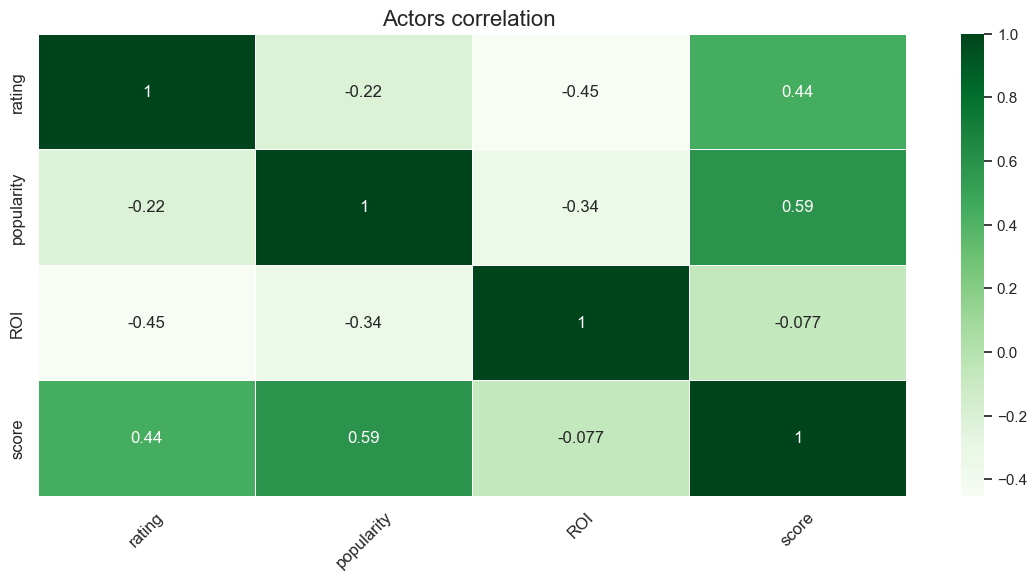

In [58]:
corr_matrix = successful_movies_df.corr()
heatmap(corr_matrix , "Greens")

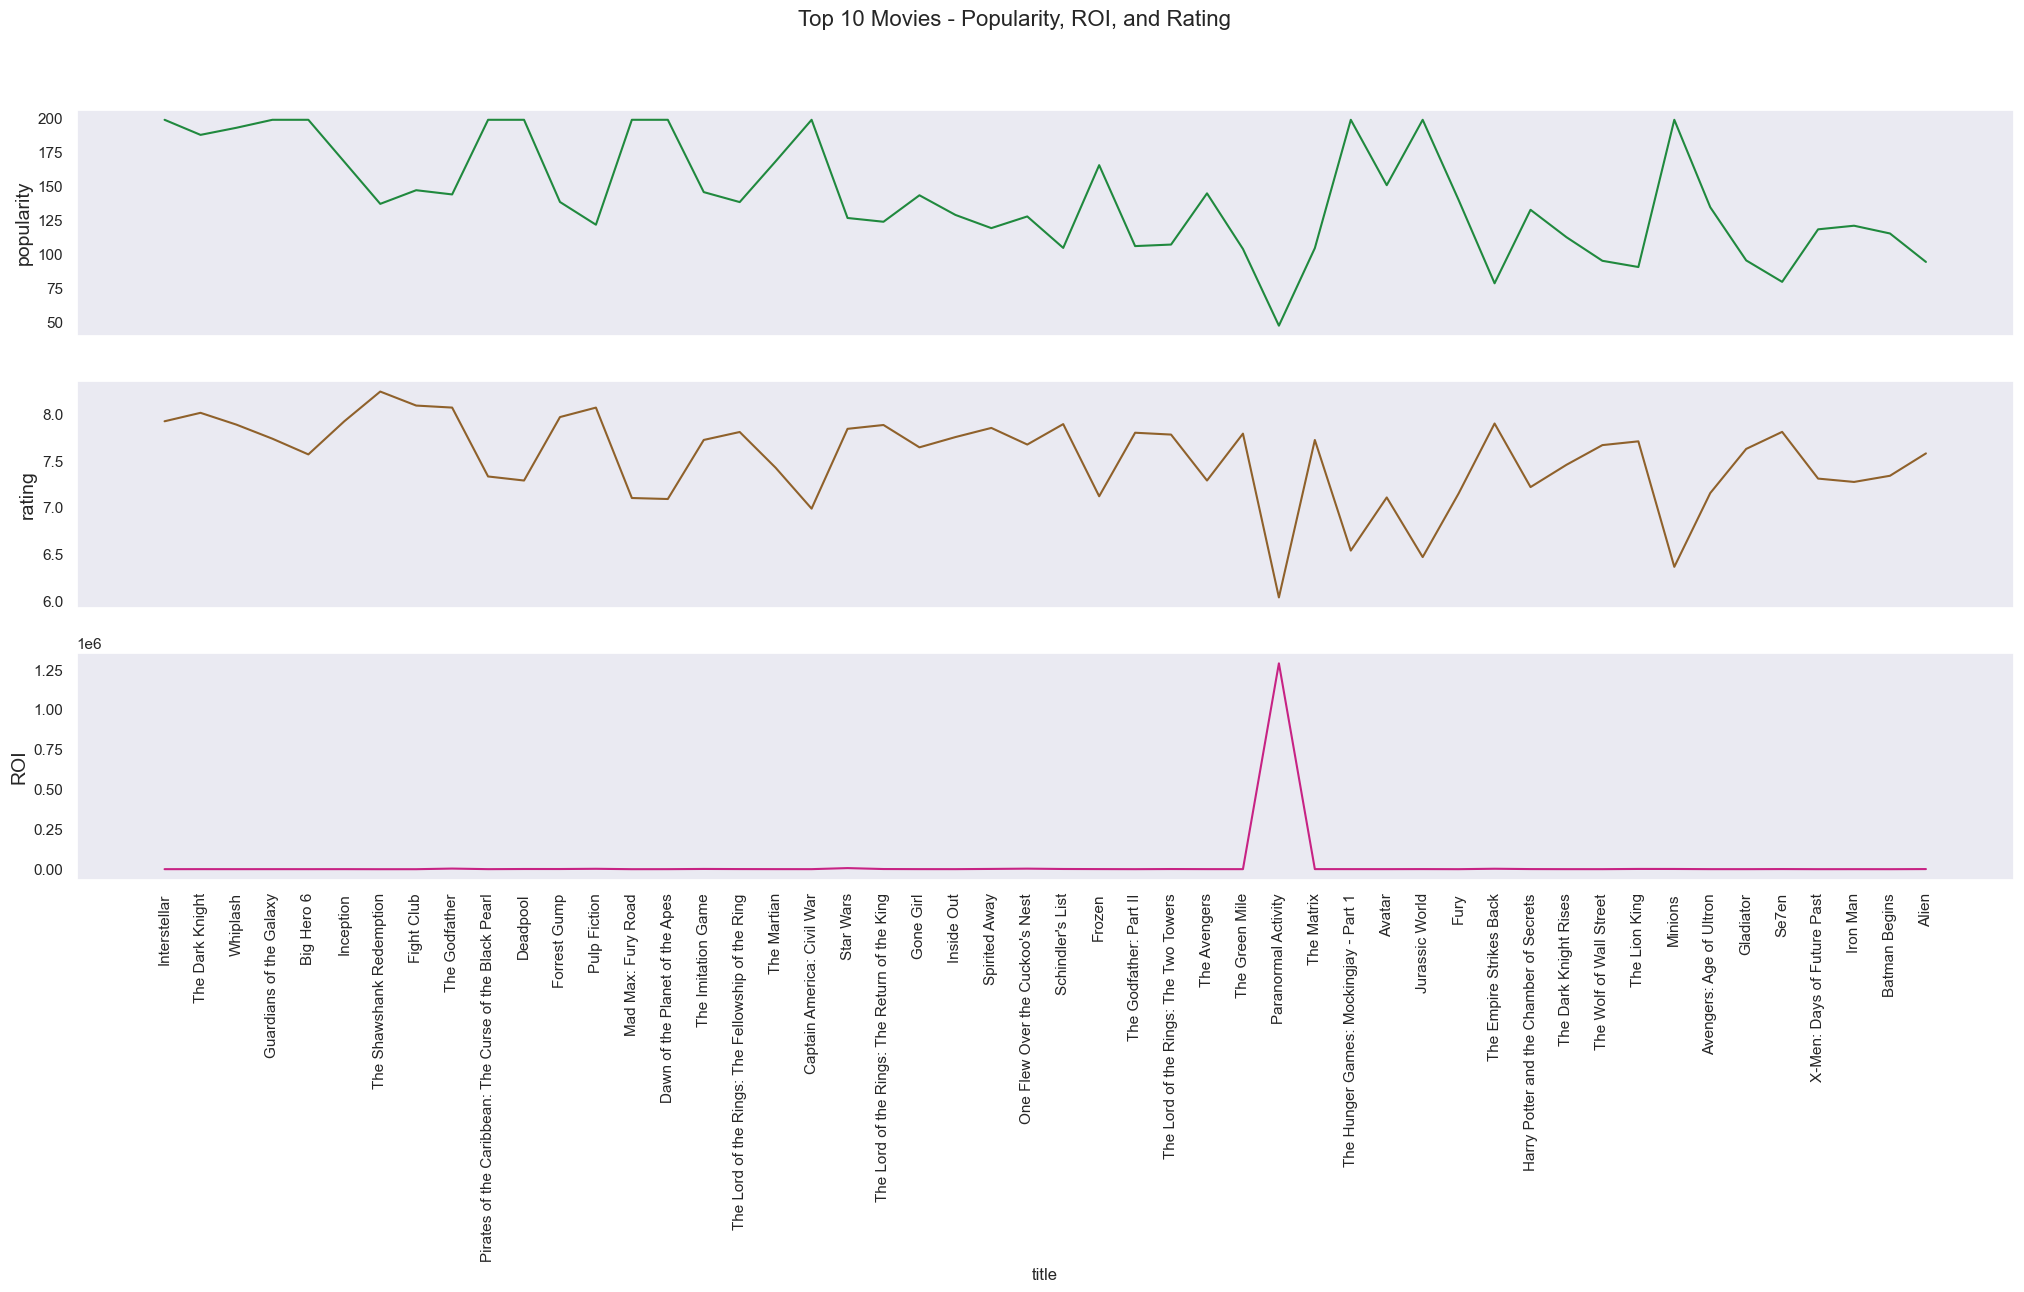

In [145]:
fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)

sns.lineplot(data=successful_movies_df, x='title', y='popularity',color=generate_random_color(),ax=ax[0])
sns.lineplot(data=successful_movies_df, x='title', y='rating',color=generate_random_color(), ax=ax[1])
sns.lineplot(data=successful_movies_df, x='title', y='ROI' ,color=generate_random_color(), ax=ax[2])

ax[0].set_ylabel('popularity', fontsize=14)
ax[1].set_ylabel('rating', fontsize=14)
ax[2].set_ylabel('ROI', fontsize=14)


plt.xticks(rotation=90)
fig.suptitle('Top 10 Movies - Popularity, ROI, and Rating', fontsize=16);


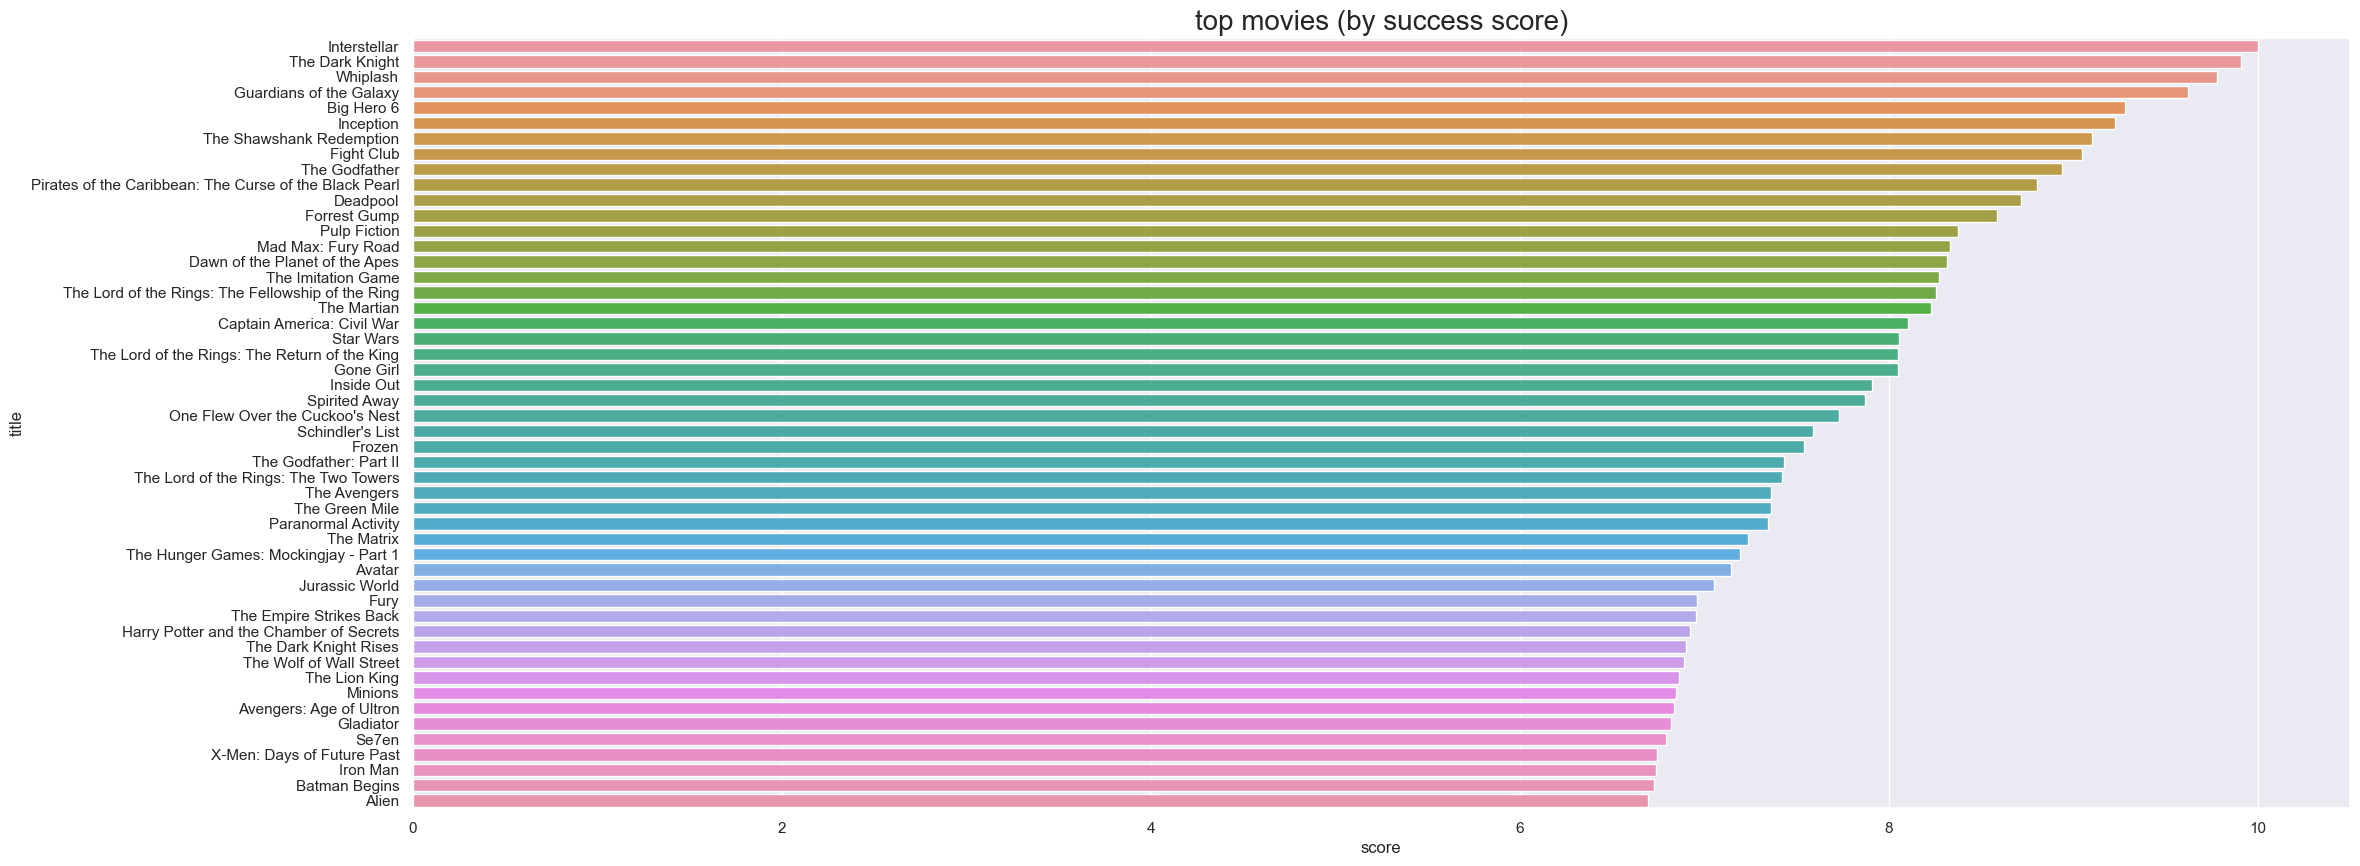

In [60]:
fig, ax = plt.subplots( figsize=(25, 10))

sns.barplot(successful_movies_df,y='title',x='score')
ax.set_title('top movies (by success score)',fontsize=20);

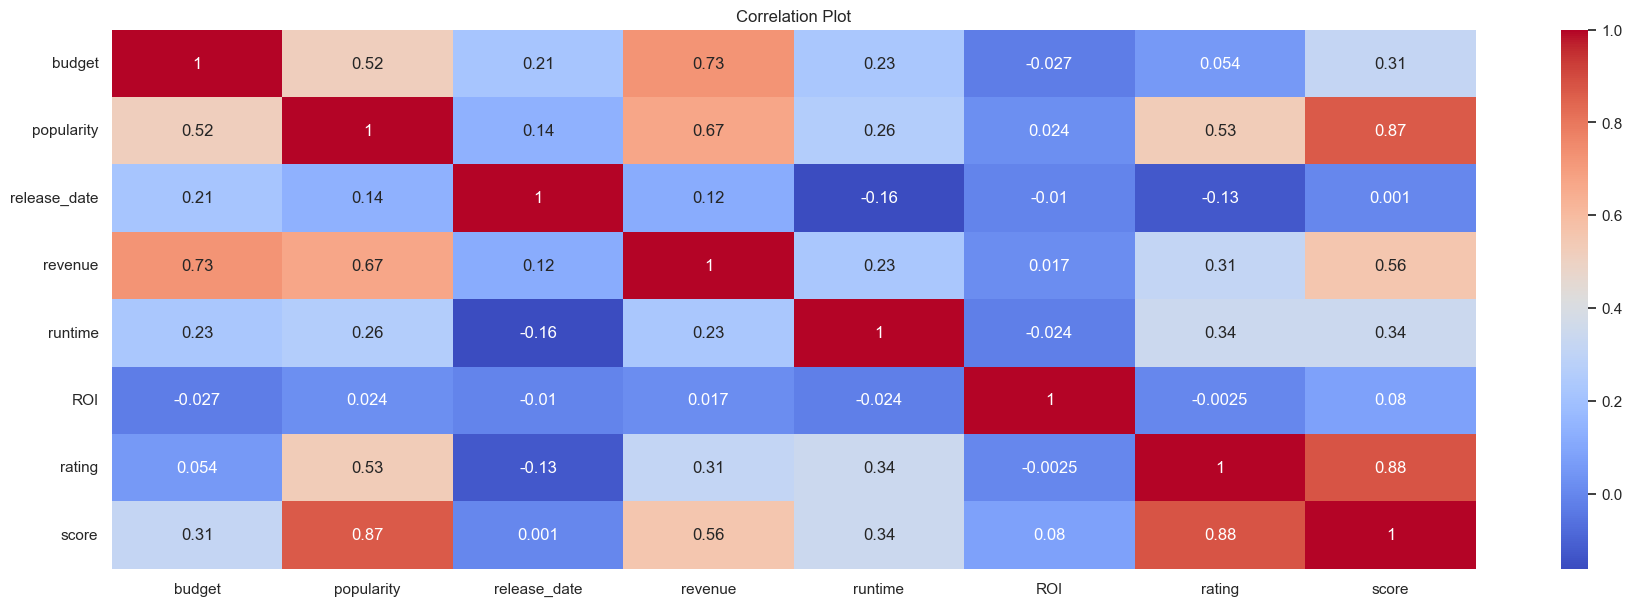

In [61]:
sns.set_theme(style = "dark")

corr_matrix = df.corr()

fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(22, 7))

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

plt.title('Correlation Plot')

plt.show()

### 3. Does the choice of top directors generally make the film successful ? 

To answer this question, we first need to consider a score for each director so that we can find the connection between successful films and directors.

#### 1. Scoring directors

##### calculation

In [62]:
director_df = df.groupby('director')[['popularity','rating','ROI']].mean().reset_index()
director_df['movies count'] = df.groupby('director').size().values

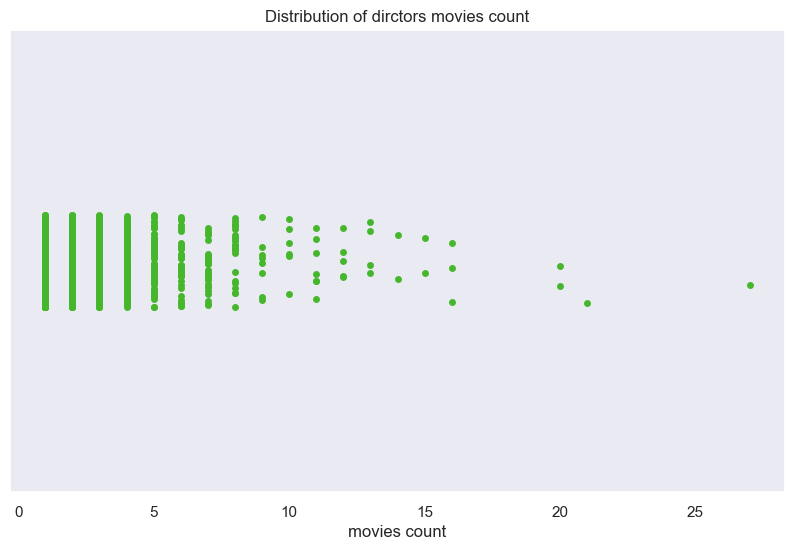

In [63]:
fig , ax =plt.subplots(figsize=(10, 6))
sns.stripplot(data=director_df , x='movies count', color= generate_random_color())

plt.title('Distribution of dirctors movies count');

For directors, we consider a score based on popularity, rating, average profit and number of movies

In [64]:

scale_popularity = scale.fit_transform(director_df[['popularity']])
scale_rating = scale.fit_transform(director_df[['rating']])
scale_profit = scale.fit_transform(director_df[['ROI']])
scale_count = scale.fit_transform(director_df[['movies count']])

director_df ['score'] = scaler.fit_transform((scale_popularity * .2) + (scale_rating * .2) + (scale_profit * .2) + (scale_count * .4))

director_df.sort_values(by='score',ascending=False,inplace=True)
director_df.to_csv('./data/directors.csv')

##### Draw plots

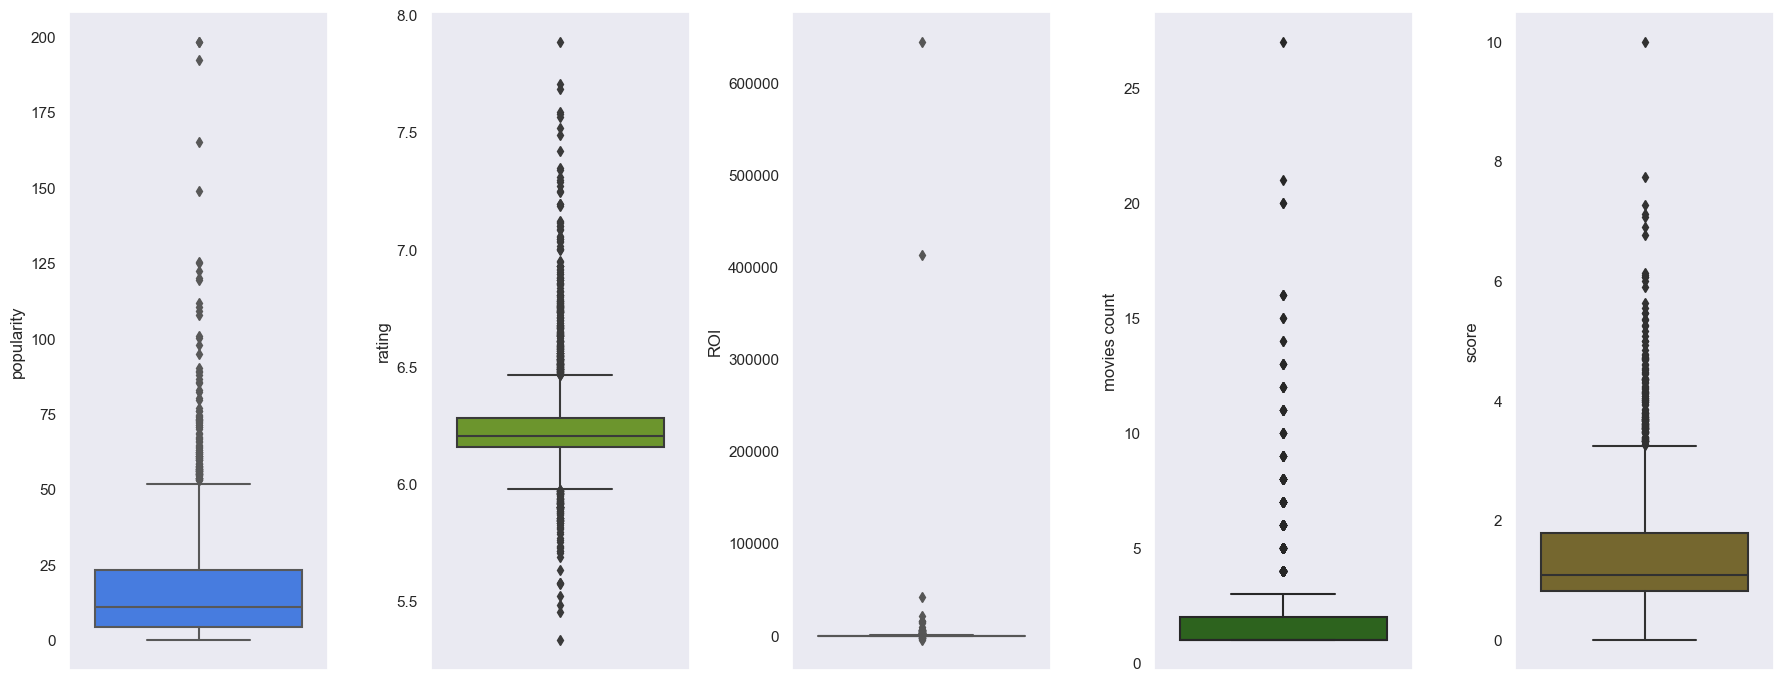

In [65]:
box_plot(director_df, [1,2,3,4,5])

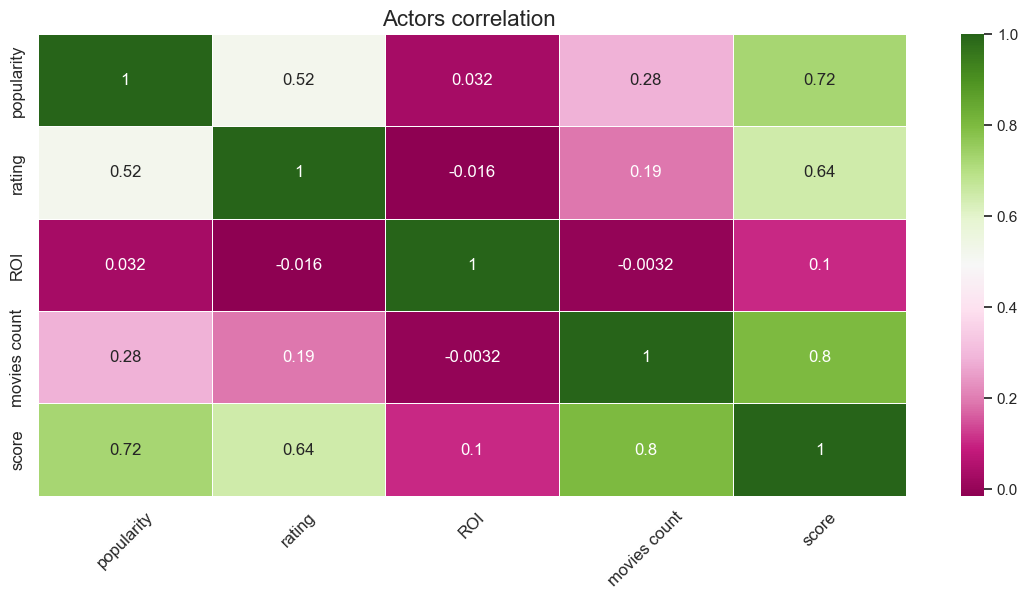

In [66]:
corr_matrix = director_df.corr()
heatmap(corr_matrix,'PiYG')

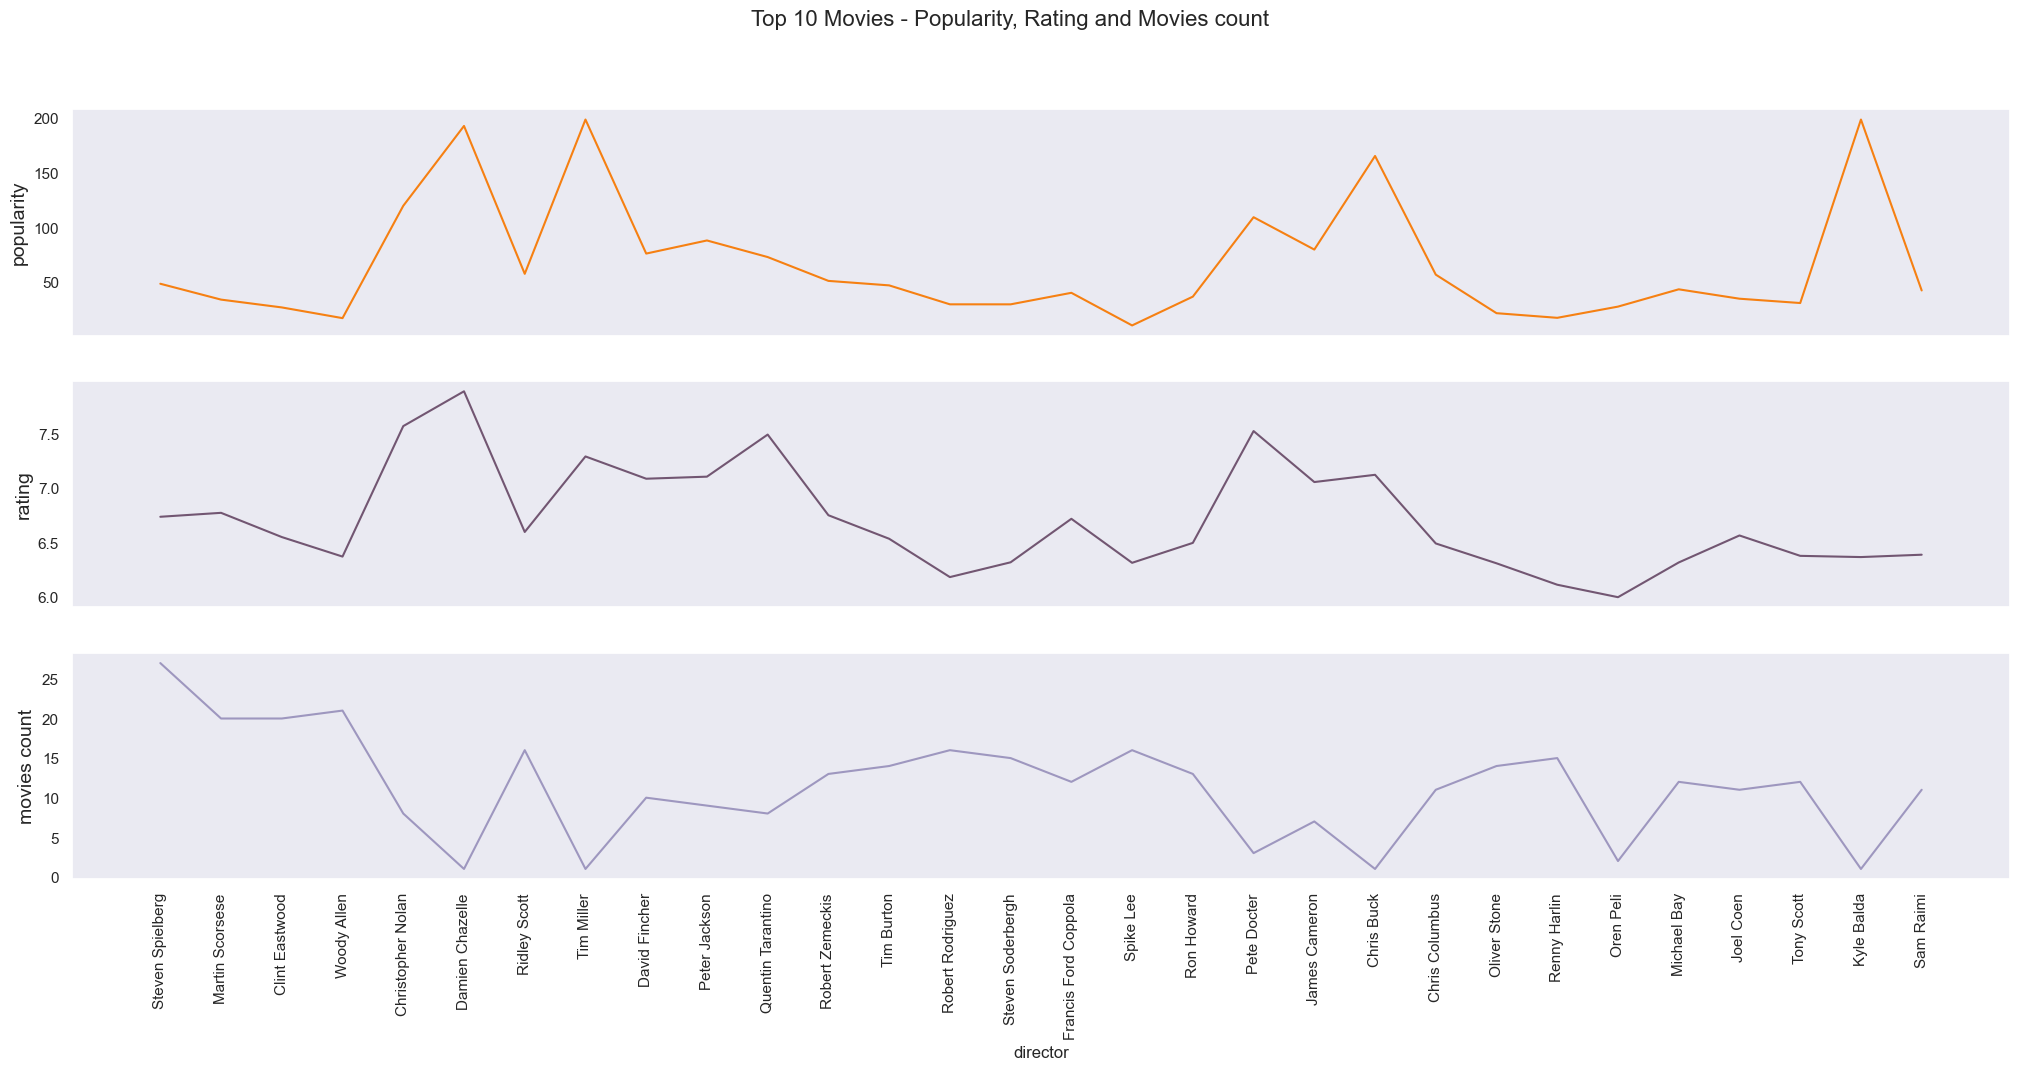

In [67]:
fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)

sns.lineplot(data=director_df.head(30), x='director', y='popularity',color=generate_random_color(),ax=ax[0])
sns.lineplot(data=director_df.head(30), x='director', y='rating',color=generate_random_color(), ax=ax[1])
sns.lineplot(data=director_df.head(30), x='director', y='movies count',color=generate_random_color(),ax=ax[2])

ax[0].set_ylabel('popularity', fontsize=14)
ax[1].set_ylabel('rating', fontsize=14)
ax[2].set_ylabel('movies count', fontsize=14)

plt.xticks(rotation=90)
fig.suptitle('Top 10 Movies - Popularity, Rating and Movies count', fontsize=16);


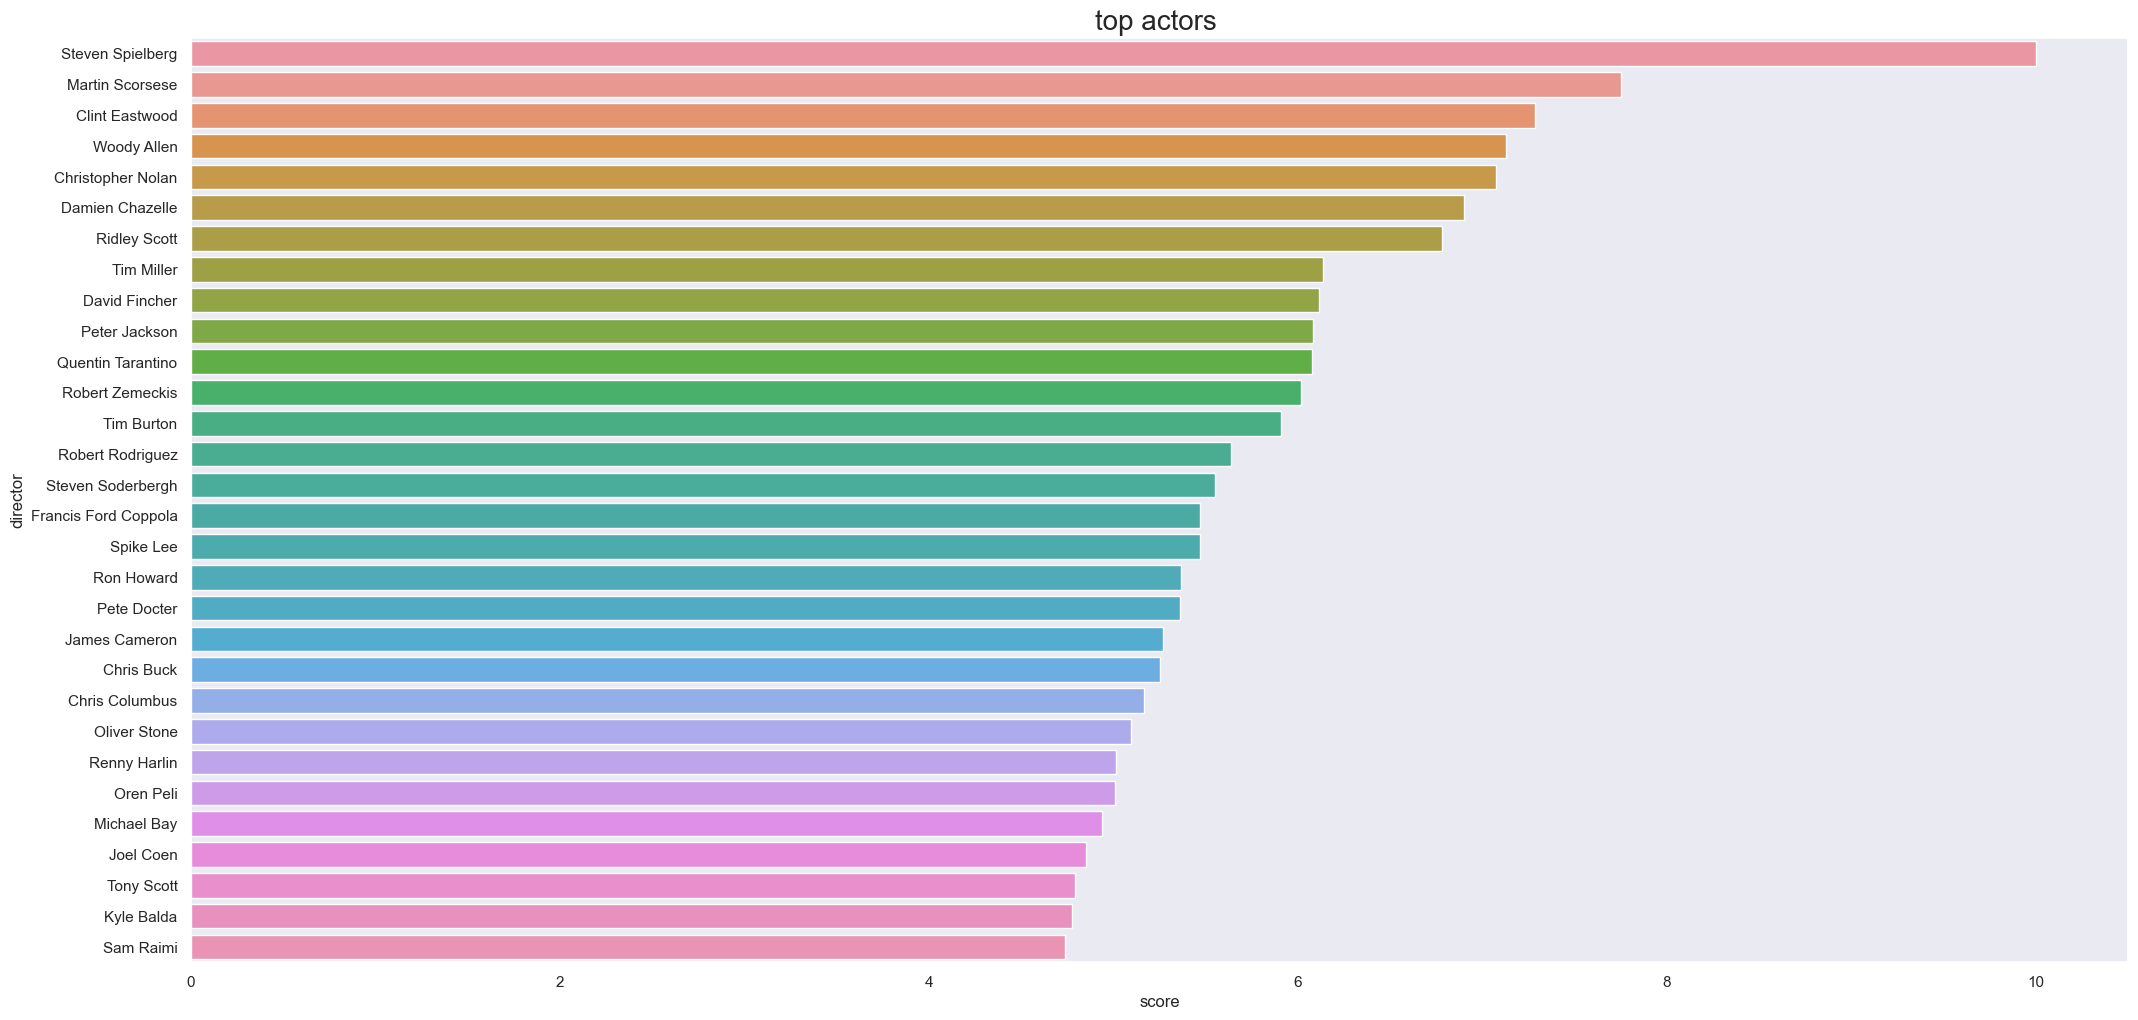

In [68]:
fig, ax = plt.subplots( figsize=(25, 12))

sns.barplot(director_df.head(30),y='director',x='score')
ax.set_title('top actors ',fontsize=20);

#### 2. Finding relation between directors and movies score

In [69]:
with_director_score_df = pd.merge(df,director_df,right_on='director',left_on = 'director')

In [70]:
with_director_score_df.rename(columns={'popularity_x':'movie popularity','popularity_y':'director popularity',
        'ROI_x':'movie ROI','ROI_y':'director ROI',
        'rating_x':'movie rating','rating_y':'director rating',
        'score_x':'movie score','score_y':'director score'},inplace=True)

In [71]:
with_director_score_df = with_director_score_df[['title','movie popularity','director popularity','movie ROI','director ROI',
                                                'movie rating','director rating','movie score','director score']]

correlation between director and movie score : 0.5229685848742726


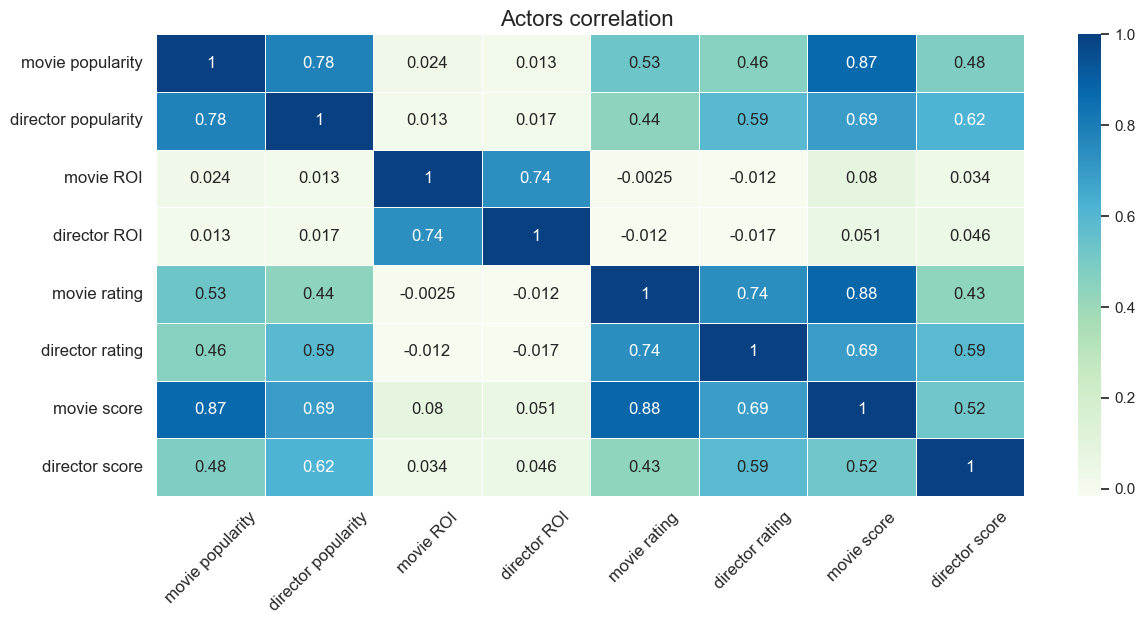

In [72]:
corr_matrix = with_director_score_df.corr()
print(f"correlation between director and movie score : {corr_matrix.loc['movie score','director score']}")
heatmap(corr_matrix,'GnBu')

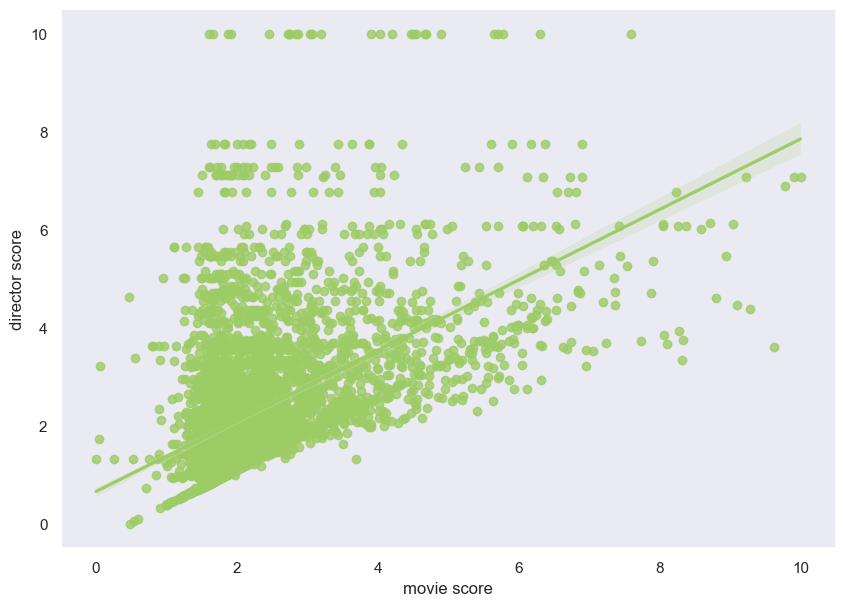

In [73]:
fig , ax = plt.subplots(figsize = (10,7))
sns.regplot(with_director_score_df, x= 'movie score', y='director score' , color=generate_random_color());

Based on the above results, it cannot be concluded that there is a **strong relationship** between the score of directors and the score of films.

### 4. the movies kick the bucket with a sequel? 

#### 1. Analysis of the question

In [74]:
sequel_indicators = re.compile(r"\b(part|II{1,3}|III{1,2}|IV|V|VI|returns|revenge|rises)\b", flags=re.IGNORECASE)
ending_with_number =  re.compile(r"(?:\b[2-6]$|^\d$|^\d \d$)")
without_digit_and_indicators_pattern = re.compile(r":(.*)")
numbers_pattern =  re.compile(r"^\d+[-:/]?\d*$")
ending_with_multiple_number = re.compile(r"\d.*")
ending_with_space = re.compile(r' +$')

def is_potential_sequel(title):
    if bool(numbers_pattern.search(title)): return False
    else : return (bool(sequel_indicators.search(title)) 
        or bool(ending_with_number.search(title))
        or bool(without_digit_and_indicators_pattern.search(title)))
        

potential_sequels = df[df["title"].apply(is_potential_sequel)][['title','release_date']].sort_values(by='title')

potential_sequels["title"] = potential_sequels["title"].str.replace(ending_with_number, "")
potential_sequels["title"] = potential_sequels["title"].str.replace(without_digit_and_indicators_pattern, "")
potential_sequels["title"] = potential_sequels["title"].str.replace(sequel_indicators, "")
potential_sequels["title"] = potential_sequels["title"].str.replace(ending_with_multiple_number, "")
potential_sequels["title"] = potential_sequels["title"].str.rstrip()

potential_sequels =potential_sequels.title.unique()

In [75]:
sequels_df=pd.DataFrame({'title': [], 'release_date': [], 'popularity': [], 'ROI': [], 'rating': [], 'orginal_title': [], 'renew': []})
def sequels(title, skip=1 , n = 1):
    global sequels_df
    befor = 0
    sequel_df = df[df.title.str.contains(title)].sort_values(by='release_date').reset_index(drop=True)
    seq = range(skip, len(sequel_df.release_date.values))

    for i in seq:

        common_cast = len(np.intersect1d(sequel_df.loc[i - 1, 'cast'], sequel_df.loc[i, 'cast'])) >= 1
        common_companies = len(np.intersect1d(sequel_df.loc[i - 1, 'companies'], sequel_df.loc[i, 'companies'])) >= 1
        common_crew = len(np.intersect1d(sequel_df.loc[i - 1, 'crew'], sequel_df.loc[i, 'crew'])) >= 2
    

        if common_cast or (common_companies and common_crew):
            befor = 1

            
            new_row = {
                'title': title,
                'release_date': sequel_df.loc[i - 1, 'release_date'],
                'popularity': sequel_df.loc[i - 1, 'popularity'],
                'ROI': sequel_df.loc[i - 1, 'ROI'],
                'rating': sequel_df.loc[i - 1, 'rating'],
                'orginal_title' : sequel_df.loc[i - 1, 'title'],
                'reboot': skip - n
                
            }

            sequels_df = pd.concat([sequels_df,pd.DataFrame([new_row])], ignore_index=True)
        
        if befor :
                new_row = {
                    'title': title,
                    'release_date': sequel_df.loc[i, 'release_date'],
                    'popularity': sequel_df.loc[i, 'popularity'],
                    'ROI': sequel_df.loc[i, 'ROI'],
                    'rating': sequel_df.loc[i, 'rating'],
                    'orginal_title' : sequel_df.loc[i, 'title'],
                    'reboot':  skip - n
                    
                }
                sequels_df = pd.concat([sequels_df,pd.DataFrame([new_row])], ignore_index=True)
                befor = 0

        else:
            
            if befor :
                new_row = {
                    'title':title,
                    'release_date': sequel_df.loc[i, 'release_date'],
                    'popularity': sequel_df.loc[i, 'popularity'],
                    'ROI': sequel_df.loc[i, 'ROI'],
                    'rating': sequel_df.loc[i, 'rating'],
                    'orginal_title' :  sequel_df.loc[i, 'title'],
                    'reboot':  skip - n
                    
                }
                sequels_df = pd.concat([sequels_df,pd.DataFrame([new_row])], ignore_index=True)
                befor = 0

            sequels(title, i + 1 , n+1)
            return

In [76]:
for title in potential_sequels[1:]:
    sequels(title)
    
sequels_df.drop_duplicates(subset={'orginal_title'},inplace=True)
sequels_df.reset_index()
sequels_df.to_csv('./data/sequals.csv')

In [77]:
sequels=sequels_df.title.unique()
sequels_df =pd.DataFrame(columns=['title', 'popularity' , 'ROI' , 'rating' ,'num_sequels'])
for title in sequels :
    sequel_df=df[df.title.str.contains(title)].sort_values(by='release_date').reset_index(drop=True)
    
    success_mean = sequel_df[['popularity','ROI','rating']].pct_change().mean()
    current_sequel_df = pd.DataFrame({'title': [title], 'popularity': [success_mean.popularity],
                    'ROI': [success_mean.ROI],'rating': [success_mean.rating],'num_sequels':sequel_df.shape[0]})
    sequels_df =pd.concat([sequels_df, current_sequel_df], ignore_index=True)

In [78]:
def normalize(df , col):
    max_val = df[col].max()
    min_val = df[col].min()
    return df[col].apply(lambda x: 2 * (x - min_val) / (max_val - min_val) - 1)

sequels_df['popularity'] = normalize(sequels_df, 'popularity')
sequels_df['ROI'] = normalize(sequels_df, 'ROI')
sequels_df['rating'] = normalize(sequels_df, 'rating')

equal_weight = 1/3

sequels_df['success'] = (equal_weight * sequels_df['popularity'].values) + (equal_weight * sequels_df['ROI'].values) + ( equal_weight * sequels_df['rating'].values)

In [79]:
print ( '''The average success score for sequels is {} . This is not a concrete result,so we cannot say definitely that movies always fail with a sequel. 
However, if we only consider the average popularity score, which is {}, we can say movies kick the bucket with a sequel.'''.format(sequels_df['success'].mean(),sequels_df['popularity'].mean()))

The average success score for sequels is -0.45515209746964097 . This is not a concrete result,so we cannot say definitely that movies always fail with a sequel. 
However, if we only consider the average popularity score, which is -0.9215156455851524, we can say movies kick the bucket with a sequel.


#### 2. draw plot

In [80]:
top_sequels_df = sequels_df.sort_values(by='success',ascending=False).head(20)

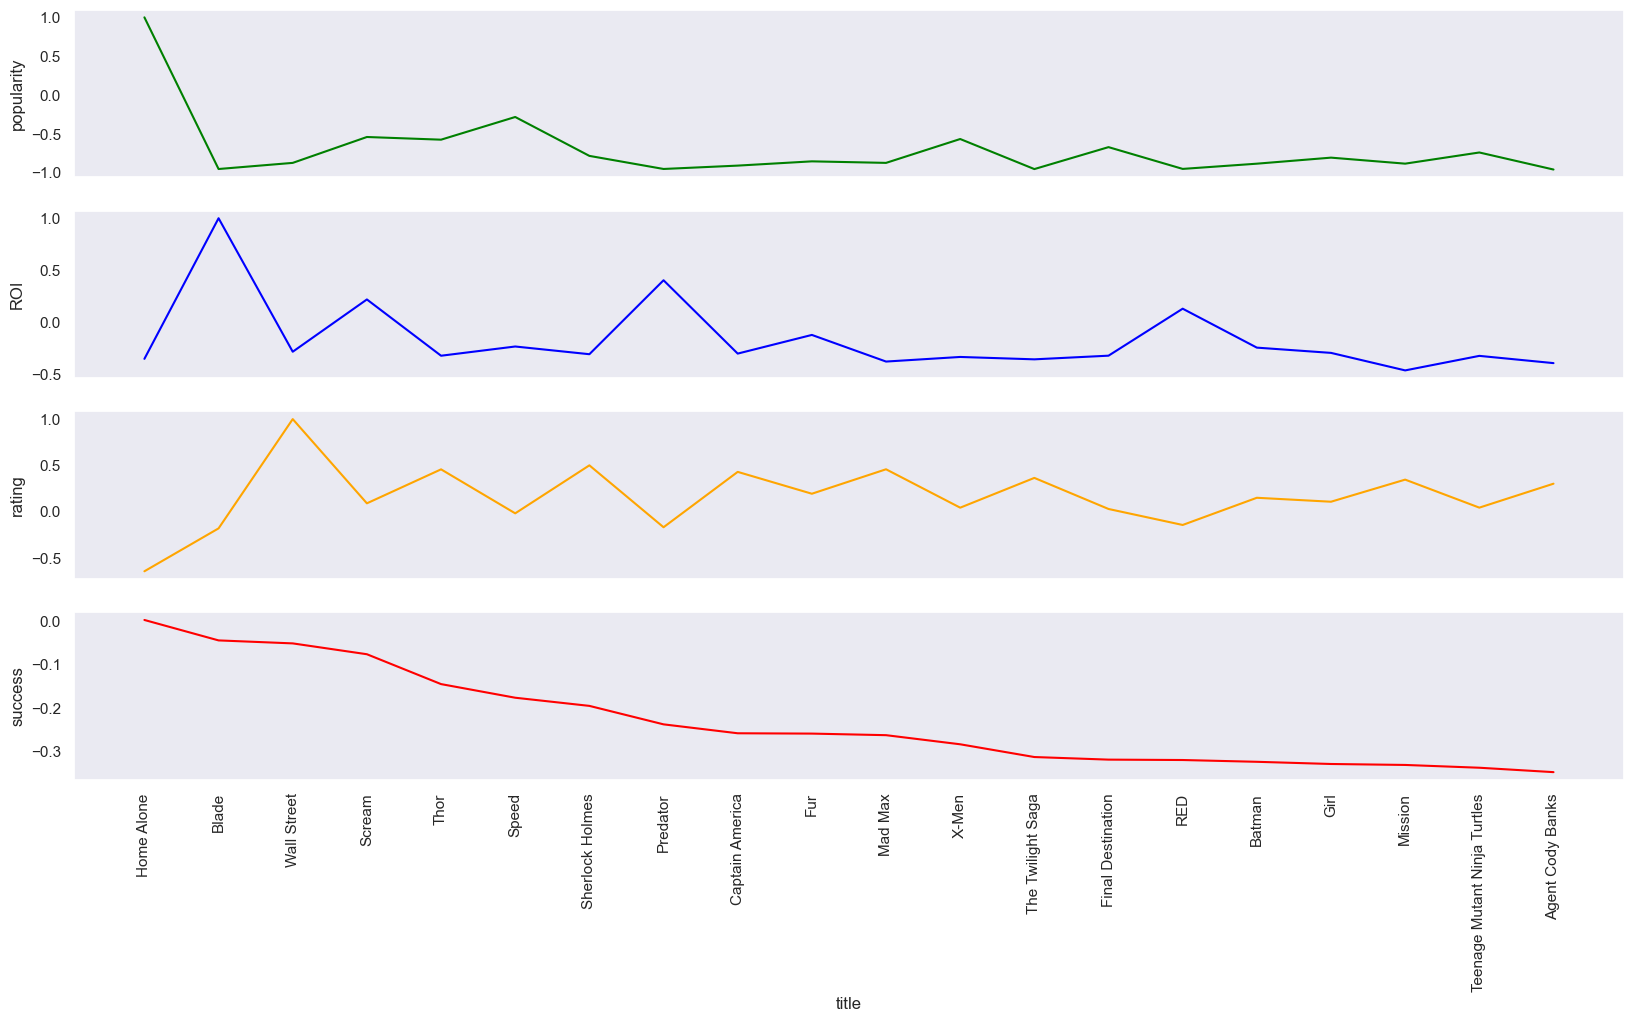

In [82]:
fig , ax = plt.subplots(4,1,figsize=(20,10),sharex=True)

sns.lineplot(top_sequels_df , x='title' , y = 'popularity' , color = 'green' ,ax=ax[0])
sns.lineplot(top_sequels_df , x='title' , y = 'ROI' , color = 'blue' ,ax=ax[1])
sns.lineplot(top_sequels_df , x='title' , y = 'rating' , color = 'orange' ,ax=ax[2])
sns.lineplot(top_sequels_df , x='title' , y = 'success' , color = 'red' ,ax=ax[3])
plt.xticks(rotation = 90);


### 5. Generally, how long are the movies? Does being long or short affect its success? 

In [83]:
print("Generally, movies have a length of {} minutes.".format(int(df['runtime'].mean())))

Generally, movies have a length of 108 minutes.


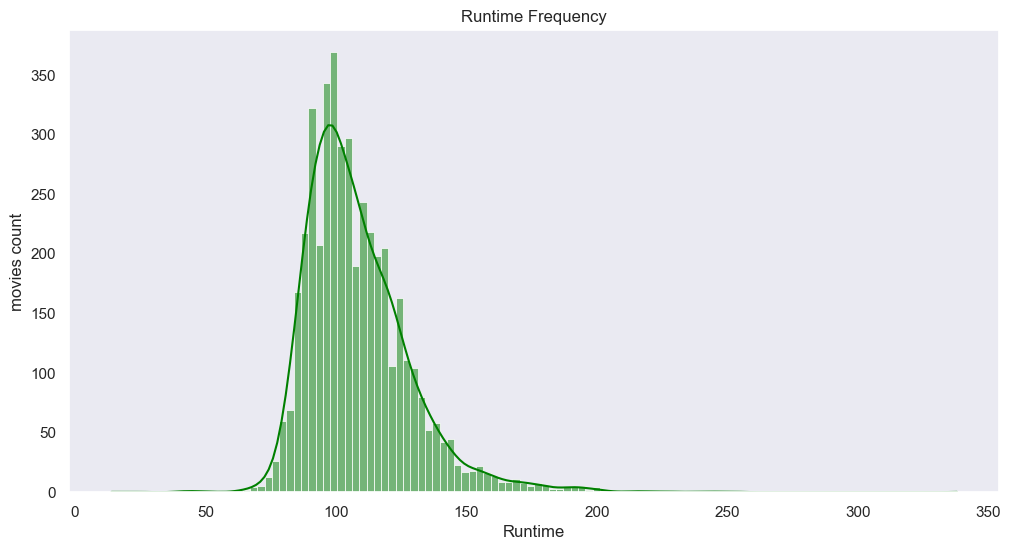

In [84]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df, x='runtime', kde=True, color='green')

plt.title('Runtime Frequency')
plt.xlabel('Runtime')
plt.ylabel('movies count');

In [85]:
print('''Based on the computed correlation between runtime and the success score ({}),
it appears that the length of the movie does not significantly affect its success.'''.format(df.corr().loc['runtime','score']))

Based on the computed correlation between runtime and the success score (0.34303278915068086),
it appears that the length of the movie does not significantly affect its success.


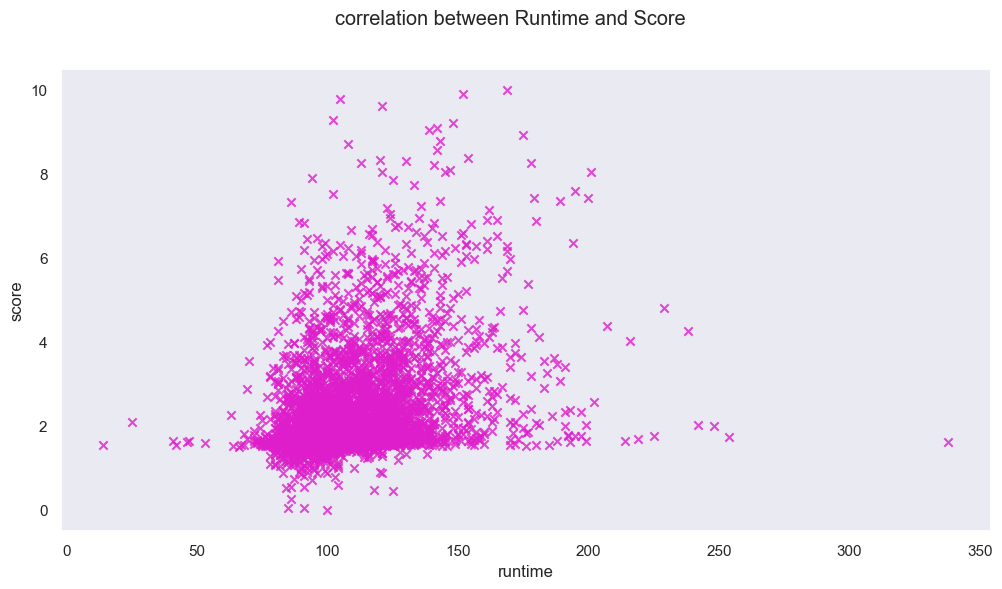

In [86]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(df, x= 'runtime', y='score', color=generate_random_color(), fit_reg=False, marker='x')
plt.suptitle('correlation between Runtime and Score');

### 6. In which languages are movies more popular and have more audiance?

In [87]:
print(f'''This correlation between popularity and revenue ({corr.loc['popularity', 'revenue']}) is good
but based on the question we need to calculate a score base on popularity and revenue''')

This correlation between popularity and revenue (0.6705676743691349) is good
but based on the question we need to calculate a score base on popularity and revenue


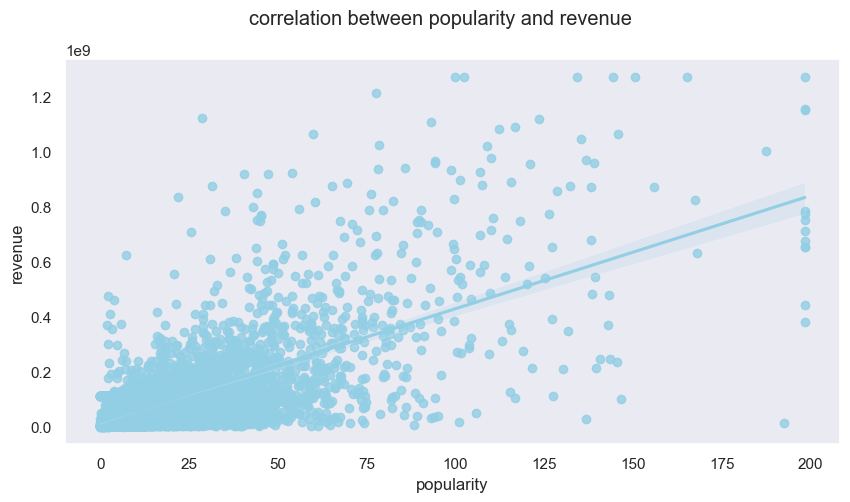

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.regplot(df, x= 'popularity', y='revenue',color=generate_random_color())
plt.suptitle('correlation between popularity and revenue');

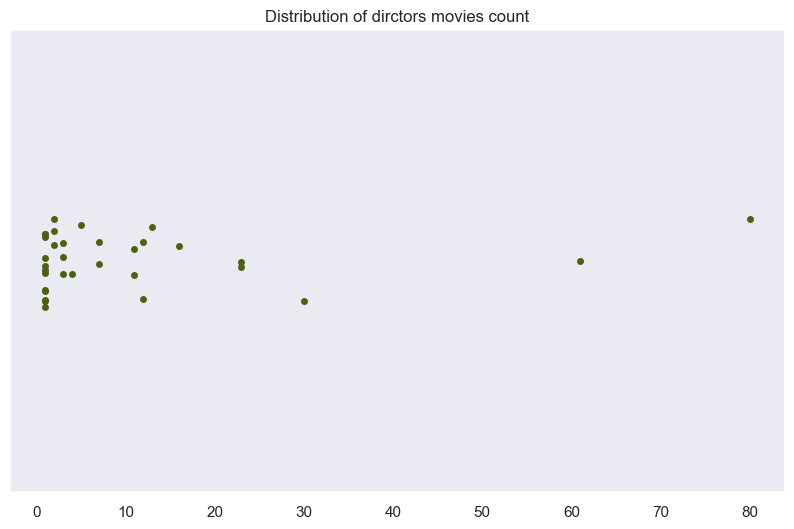

In [147]:
languages = df.groupby('language').size()

#for beter visualization we decrease en language count
languages['en']=80

fig , ax =plt.subplots(figsize=(10, 6))
sns.stripplot(data=languages , x=languages.values, color= generate_random_color())

plt.title('Distribution of dirctors movies count');

In [90]:
language_group_sizes = df['language'].map(df['language'].value_counts())
languages_df = df[language_group_sizes > 2]

languages = languages_df.groupby('language')

In [91]:
audience_base = languages['revenue'].mean().sort_index()
popularity_base = languages['popularity'].mean().sort_index()
count_base = languages.size().sort_index()




audience_base = pd.Series(scale.fit_transform(audience_base.values.reshape(-1,1)).flatten(),index=count_base.index)
popularity_base = pd.Series(scale.fit_transform(popularity_base.values.reshape(-1,1)).flatten(),index=count_base.index)
count_base = pd.Series(scale.fit_transform(count_base.values.reshape(-1,1)).flatten(),index=count_base.index)

top_languages = scaler.fit_transform((0.1 * audience_base.values.reshape(-1,1) + 0.45 * popularity_base.values.reshape(-1,1) + .45 * count_base.values.reshape(-1,1))).flatten()
top_languages_industry = pd.Series(top_languages ,audience_base.index ).sort_values(ascending=False).head(10)

iso639_to_lang = lambda series: pd.Series([pycountry.languages.get(alpha_2=iso639).name for iso639 in series])

top_languages_industry.index = iso639_to_lang(top_languages_industry.index)

In [92]:
top_languages_df = pd.DataFrame(index=popularity_base.index)
top_languages_df['popularity'] = popularity_base.values
top_languages_df['audience'] = popularity_base.values
top_languages_df['movies count'] = count_base.values

top_languages_df.to_csv('./data/top_languages.csv')

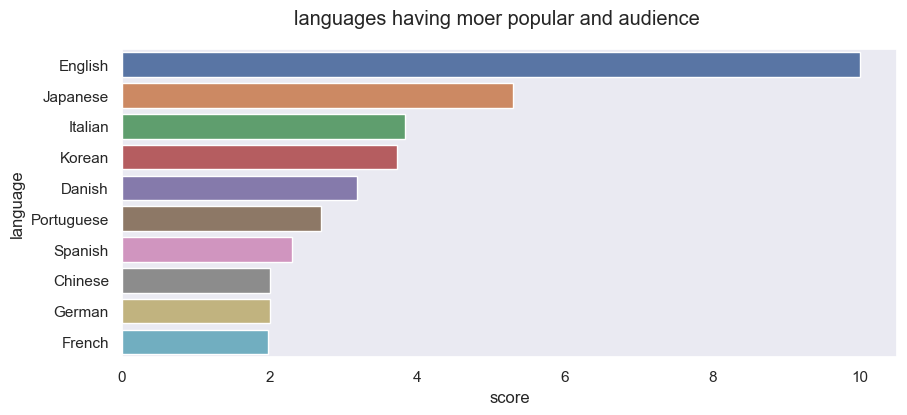

In [146]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x= top_languages_industry.values , y= top_languages_industry.index)

plt.suptitle('languages having moer popular and audience')
ax.set_ylabel('language')
ax.set_xlabel('score');

### 7. What actors make good movies?  

#### Finding good actors

In [94]:
actors = df.explode('cast')[['cast','title','popularity','rating','ROI','score']]
actors.rename(columns={'cast' : 'actor', 'score' : 'success score'},inplace=True)

In [95]:
actors_df = actors.groupby('actor')[['popularity','rating','ROI']].mean().reset_index()
actors_df['movies count'] = actors.groupby('actor').size().values

actors_df.to_csv('./data/actors.csv')

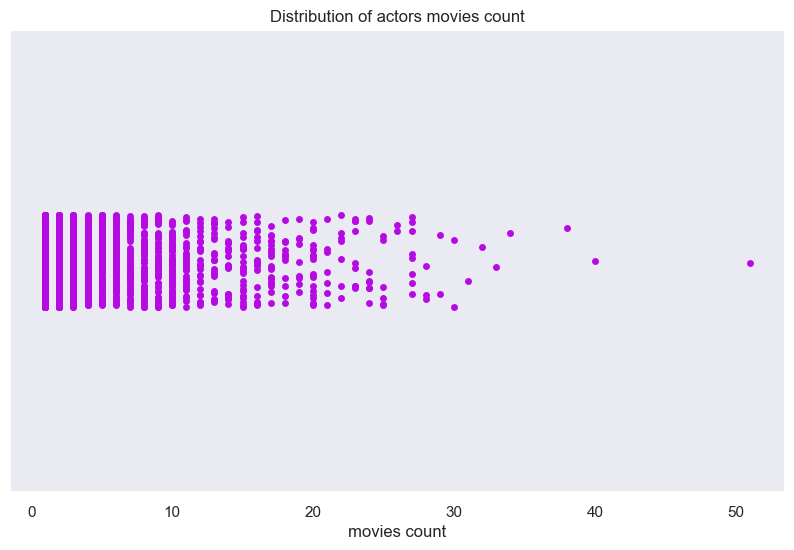

In [96]:
fig , ax =plt.subplots(figsize=(10, 6))
sns.stripplot(data=actors_df, x='movies count', color= generate_random_color())

plt.title('Distribution of actors movies count');

For the purpose of this question, we need to eliminate actors played fewer than 6 movies.

In [97]:
actors_df=actors_df[actors_df['movies count']>6]

good actor is not **accurate definition** it depend on **expert opinion** but We consider a combination of popularity, rating and movies count.

In [98]:
scale_popularity = scale.fit_transform(actors_df[['popularity']])
scale_rating = scale.fit_transform(actors_df[['rating']])
scale_count = scale.fit_transform(actors_df[['movies count']])

actors_df ['score'] = (scale_popularity * .3) + (scale_rating * .3) + (scale_count * .4)

good_actors =  actors_df.sort_values(by='score',ascending=False)

#### Draw plots

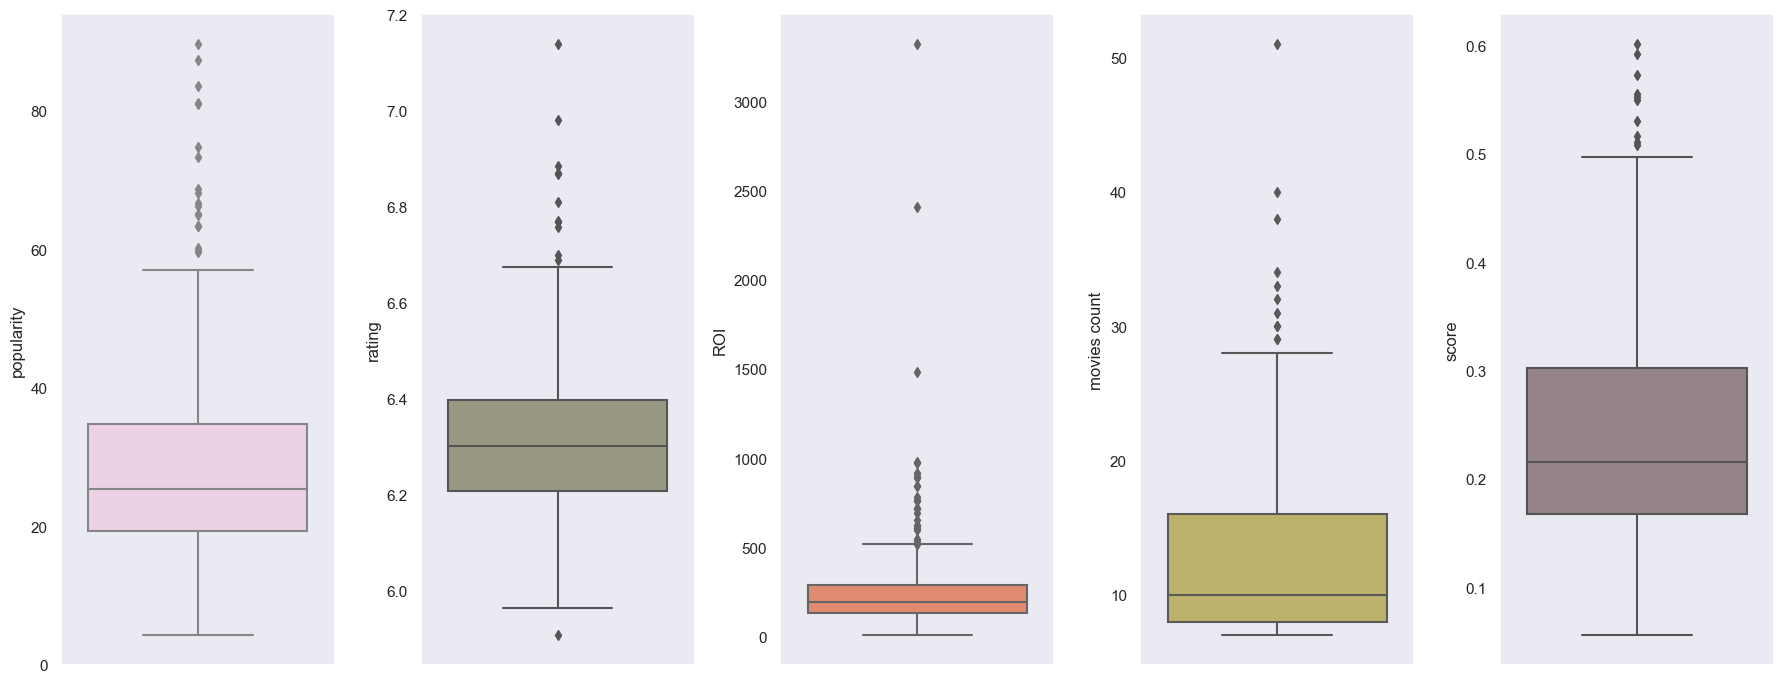

In [99]:
box_plot(good_actors, [1,2,3,4,5])

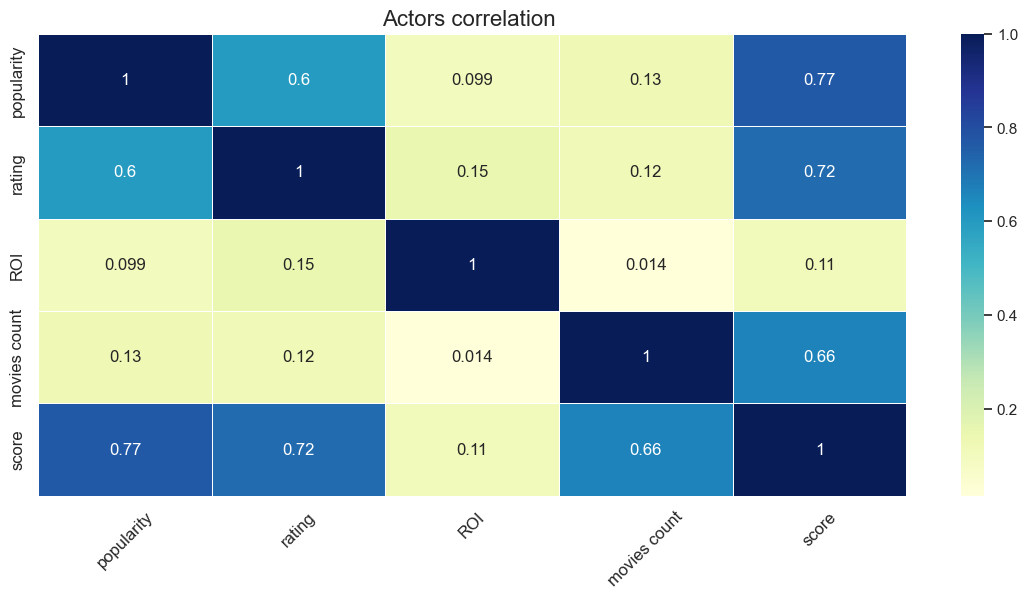

In [100]:
corr_matrix = good_actors.corr()
heatmap(corr_matrix,'YlGnBu')

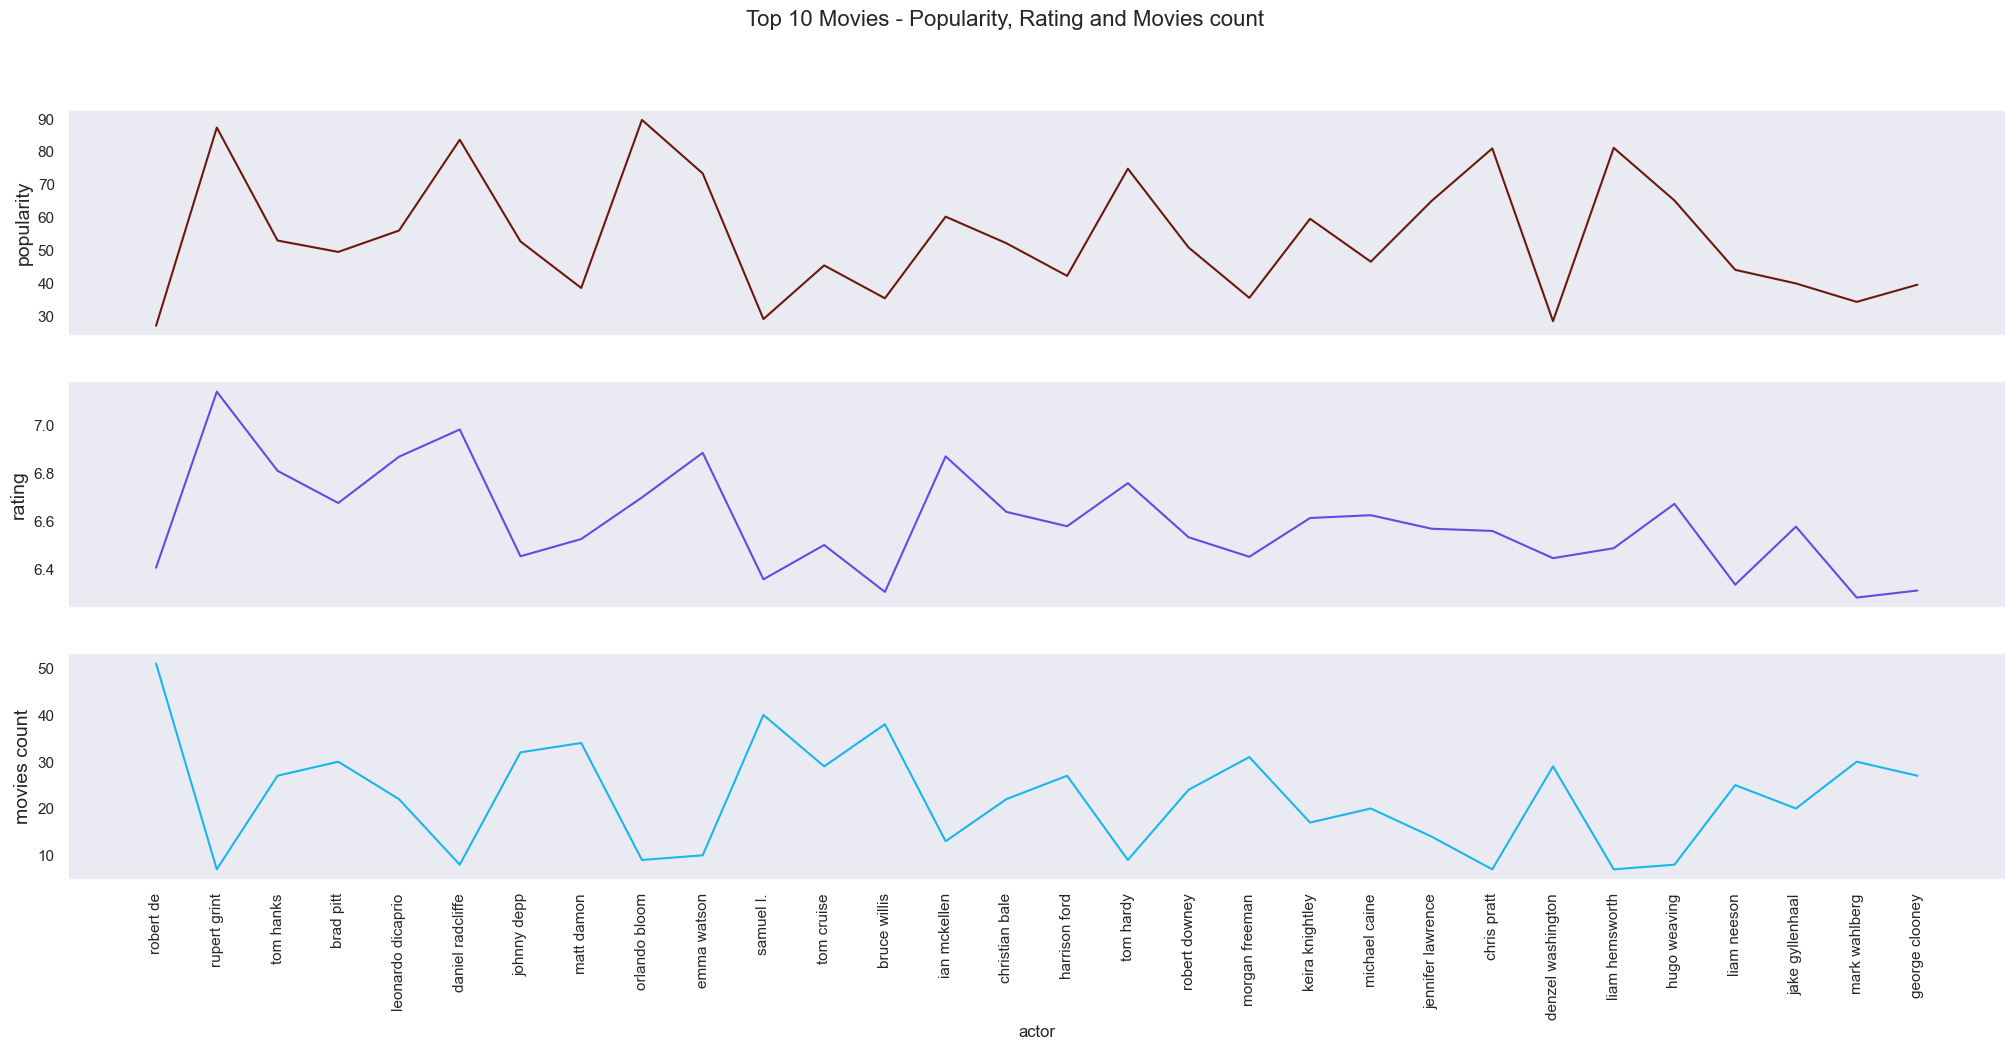

In [101]:
fig, ax = plt.subplots(3, 1, figsize=(25, 10), sharex=True)

sns.lineplot(data=good_actors.head(30), x='actor', y='popularity',color=generate_random_color(),ax=ax[0])
sns.lineplot(data=good_actors.head(30), x='actor', y='rating',color=generate_random_color(), ax=ax[1])
sns.lineplot(data=good_actors.head(30), x='actor', y='movies count',color=generate_random_color(),ax=ax[2])

ax[0].set_ylabel('popularity', fontsize=14)
ax[1].set_ylabel('rating', fontsize=14)
ax[2].set_ylabel('movies count', fontsize=14)

plt.xticks(rotation=90)
fig.suptitle('Top 10 Movies - Popularity, Rating and Movies count', fontsize=16);


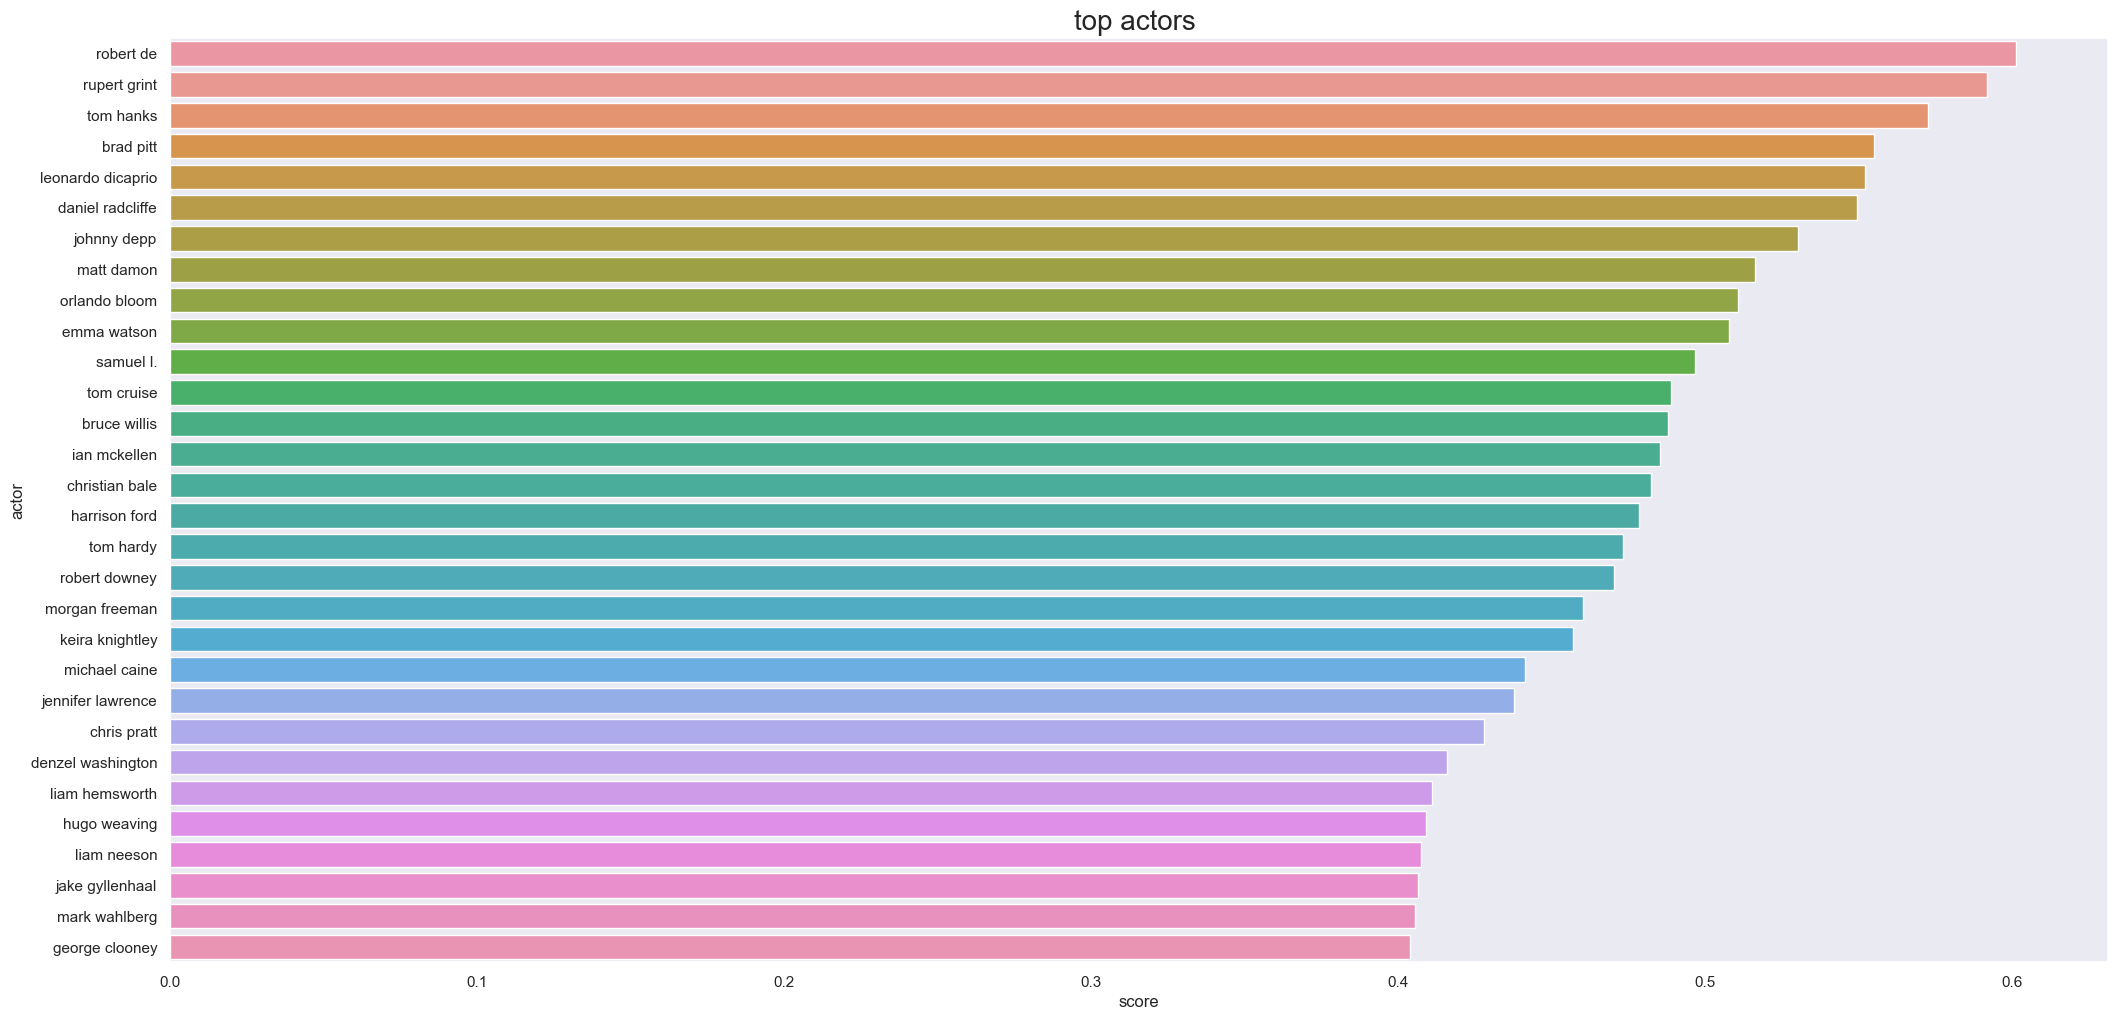

In [102]:
fig, ax = plt.subplots( figsize=(25, 12))

sns.barplot(good_actors.head(30),y='actor',x='score')
ax.set_title('top actors ',fontsize=20);

### 8. Is the rating of a movie the basis of people's choice? 

The correlation between total popularity and average popularity is 0.5310424543416936.
Thus there is not a concrete correlation


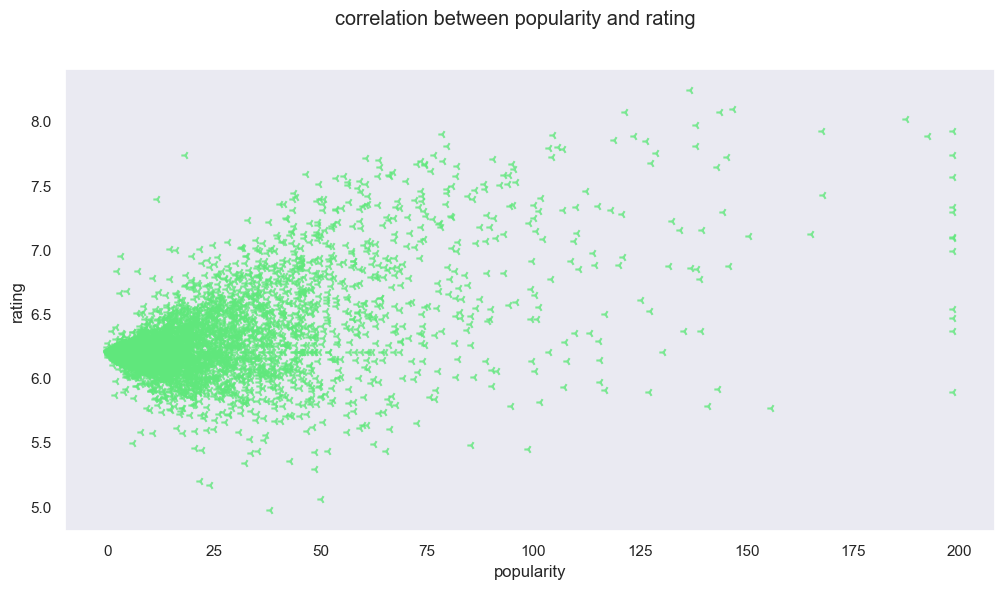

In [103]:
print(f'''The correlation between total popularity and average popularity is {corr.loc['popularity', 'rating']}.
Thus there is not a concrete correlation''')

fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(df, x= 'popularity', y='rating',fit_reg=False ,marker='3', color=generate_random_color())
plt.suptitle('correlation between popularity and rating');

### 9. create a plot about Revenue over time and tell when the revenue start growing so much and what were the causes of it? 

The answer to the question 'In which years have sales been higher, and what is the cause?' is closely related to this question .  
Let's examine them together 

In [104]:
revenue_over_time = df.groupby('release_date')['revenue'].sum()
print(f"the top ten total revenue based on years is {', '.join(revenue_over_time.sort_values(ascending=False).iloc[:10].index.map(str))}.")


the top ten total revenue based on years is 2014, 2013, 2012, 2015, 2009, 2010, 2008, 2011, 2004, 2007.


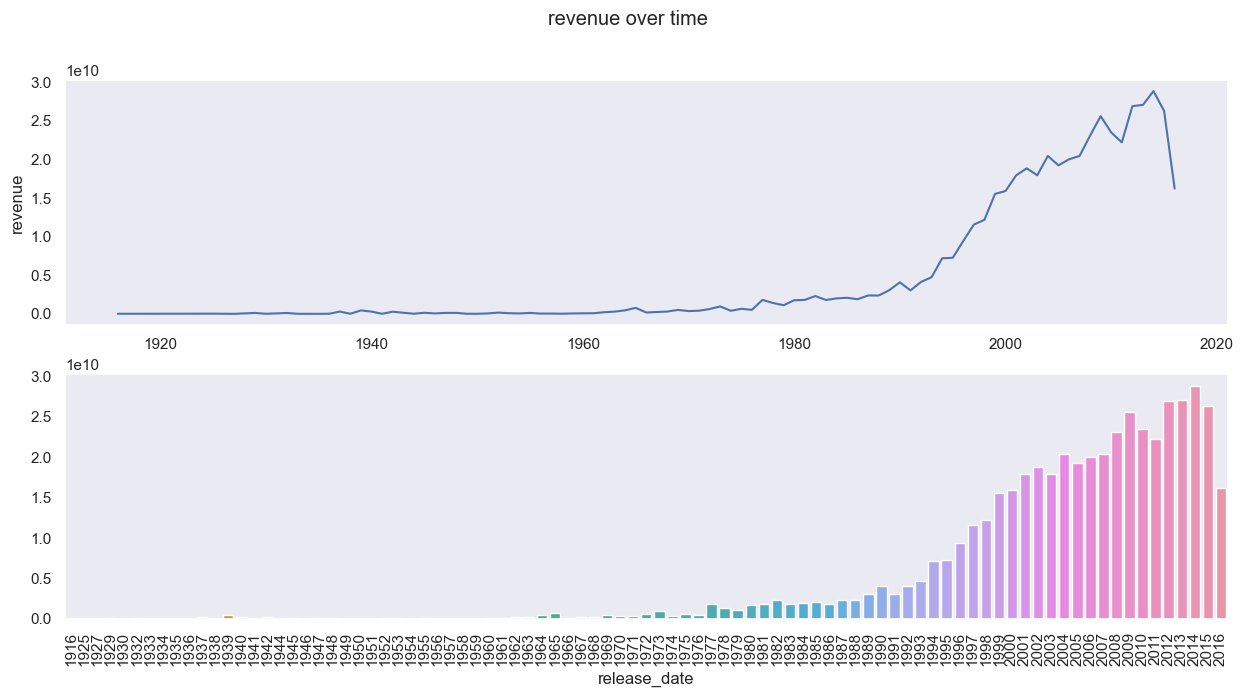

In [105]:
fig , ax  = plt.subplots(2,1,figsize = (15,7))
sns.lineplot(x=revenue_over_time.index,y=revenue_over_time.values,ax=ax[0])
sns.barplot(x=revenue_over_time.index,y=revenue_over_time.values,ax=ax[1])

plt.suptitle('revenue over time')
ax[0].set_ylabel('revenue')
ax[0].set_xlabel('')
plt.xticks(rotation=90);

In [106]:
revenue_slope = revenue_over_time.rolling(4).apply(lambda x : ( x.iloc[-1] - x.iloc[0] ) / ( x.index[-1] - x.index[0])).dropna()
range_format = ['1916']
for i in range(1, revenue_slope.shape[0]):
    range_format.append(revenue_slope.index[i - 1].astype(str) + '-' + revenue_slope.index[i].astype(str))
revenue_slope.index = range_format

print(f"The steepest slopes happened in {', '.join(revenue_slope.sort_values(ascending=False).iloc[0:10].sort_index().index)}")

The steepest slopes happened in 1993-1994, 1995-1996, 1996-1997, 1997-1998, 1998-1999, 1999-2000, 2000-2001, 2007-2008, 2008-2009, 2013-2014


#### what's the reason ?

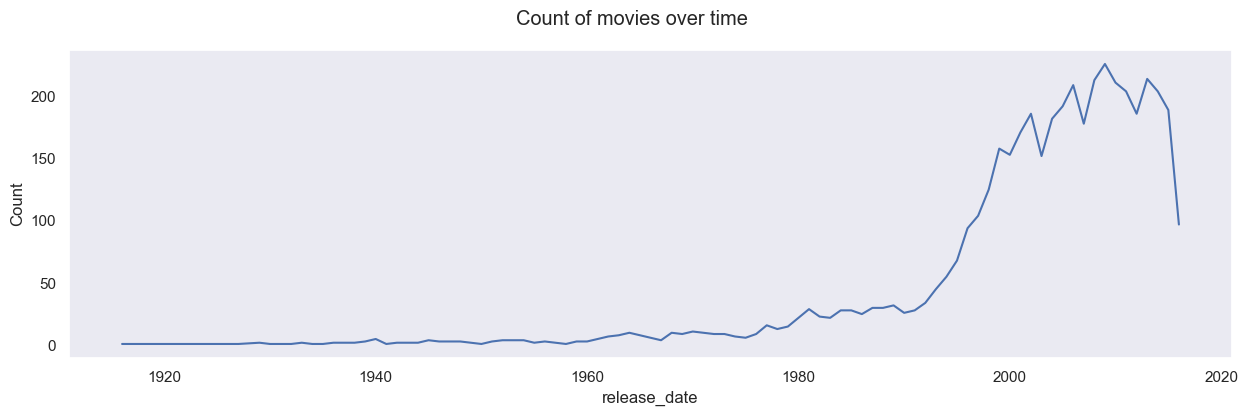

In [107]:
movies_count_over_time=df.groupby('release_date').size()
fig , ax  = plt.subplots(figsize = (15,4))
sns.lineplot(x=movies_count_over_time.index,y=movies_count_over_time.values)

plt.suptitle('Count of movies over time')
ax.set_ylabel('Count');

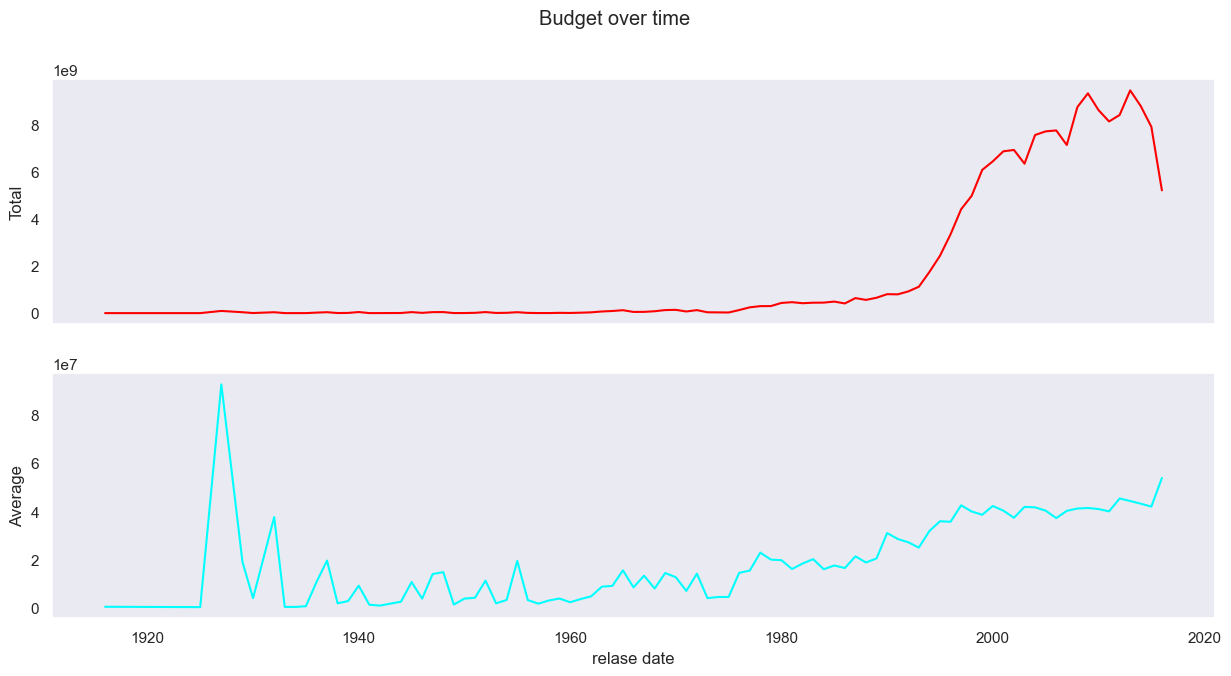

In [108]:
total_budget_over_time = df.groupby('release_date')['budget'].sum()
avg_budget_over_time = df.groupby('release_date')['budget'].mean()

fig , ax  = plt.subplots(2,1,figsize = (15,7),sharex=True)
sns.lineplot(x=total_budget_over_time.index,y=total_budget_over_time.values,color='red',ax=ax[0])
sns.lineplot(x=avg_budget_over_time.index,y=avg_budget_over_time.values,color='cyan',ax=ax[1])

plt.suptitle('Budget over time')
ax[0].set_ylabel('Total')
ax[1].set_ylabel('Average')
ax[1].set_xlabel('relase date');

### 10. Which category of movies is highly popular, but critics score them low? What is their genre? 

Critics in the industry are defined by **companies** like Rotten Tomatoes, Metacritic, Box Office Mojo, and so on  
However, based on the provided metadata, we have **user votes**, which are referred to as the **audience score**  
in the industry. To solve this question, we consider user votes as critics.

In [109]:
high_popularity = ((df['popularity'].max() - df['popularity'].min()) / 3 ) + (2 * df['rating'].min())
low_rating = ((df['rating'].max() - df['rating'].min()) / 3 ) + df['rating'].min()

In [110]:
filtered_sorted_df =df[((df.popularity > high_popularity) & (df.rating < low_rating))][['genres','title',
                    'popularity','rating']].sort_values(by='popularity',ascending=False).reset_index(drop=True).copy()

In [111]:
genres = filtered_sorted_df.explode('genres').groupby('genres').size().sort_values(ascending=False)

In [112]:
print(f'''The genre of movies is highly popular, but critics score them low is : {' , '.join(genres.index)}''')

The genre of movies is highly popular, but critics score them low is : adventure , action , fantasy , fiction , science , drama , thriller , comedy , romance , crime , family


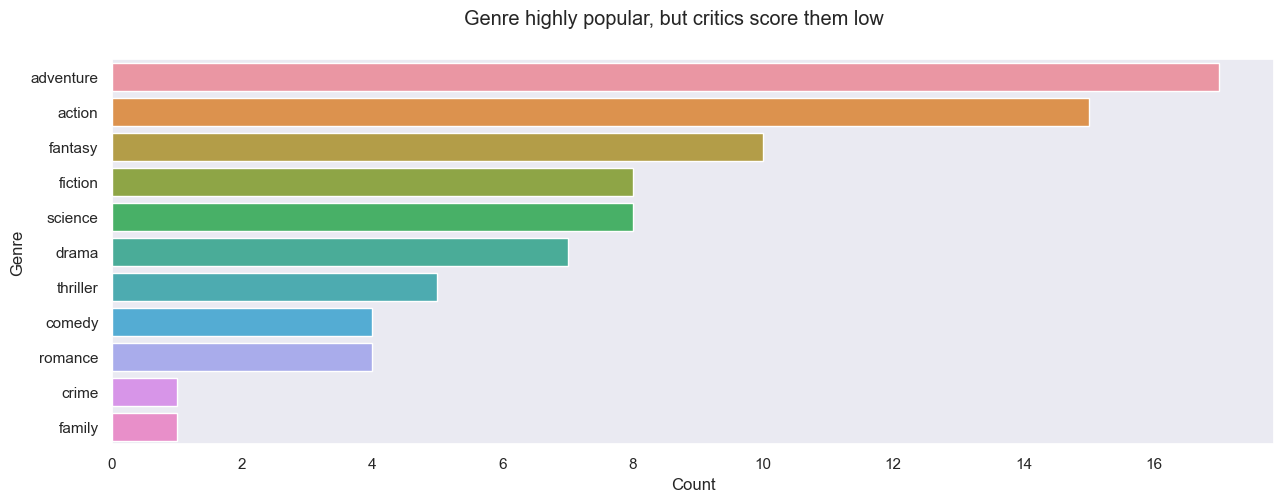

In [113]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y=genres.index, x=genres.values, ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
fig.suptitle('Genre highly popular, but critics score them low');

### 11. Which companies have more sales, popularity and the number of films made?

In [114]:
countries_df =df.explode('companies')[['companies','revenue','popularity']]


companies_total_sales = countries_df.groupby('companies')['revenue'].sum().sort_values(ascending=False).head(10)
companies_popularity_score =  countries_df.groupby('companies')['popularity'].sum().sort_values(ascending=False).head(10)
companies_movie_count =  countries_df.groupby('companies')['companies'].count().sort_values(ascending=False).head(10)

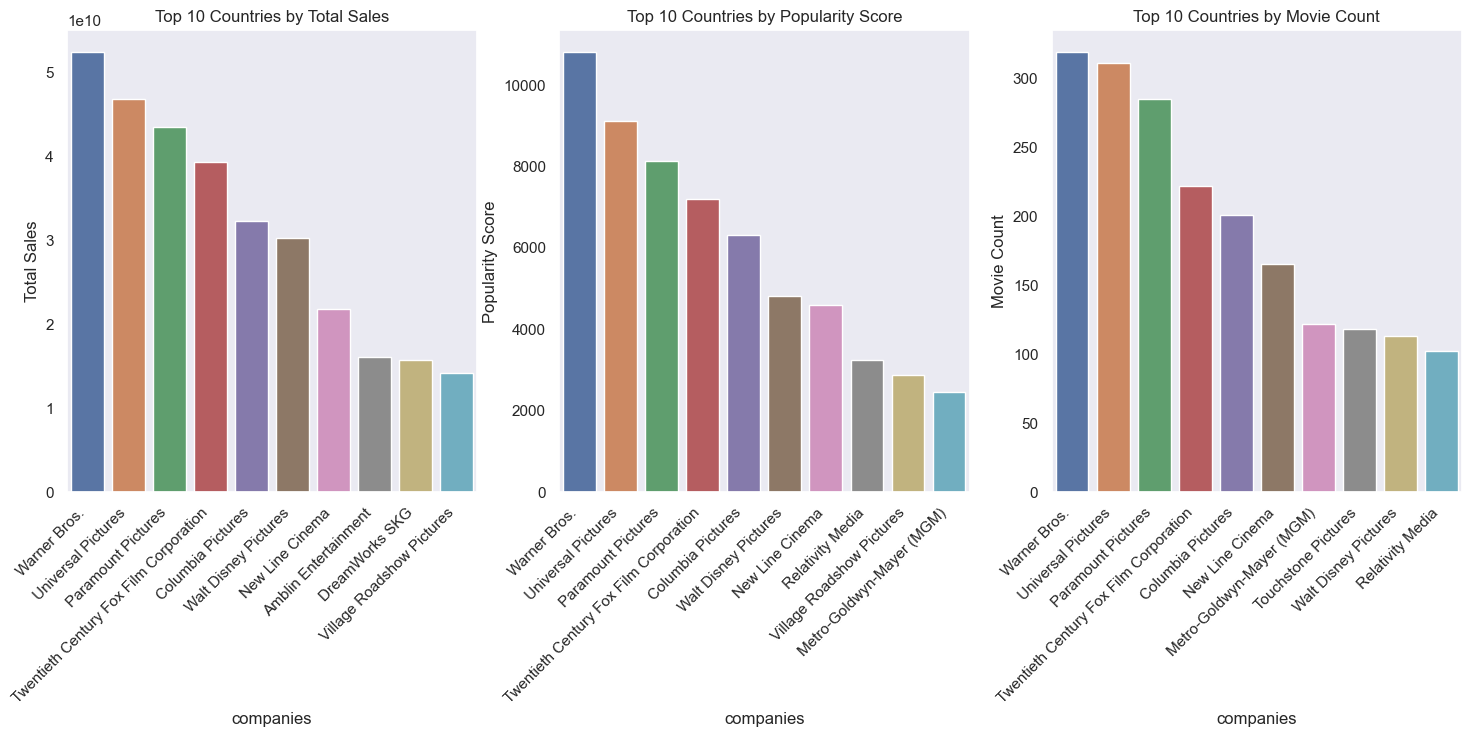

In [115]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot total_sales
sns.barplot(x=companies_total_sales.index, y=companies_total_sales.values, ax=ax[0])
ax[0].set_xlabel('companies')

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
ax[0].set_ylabel('Total Sales')
ax[0].set_title('Top 10 Countries by Total Sales')

# Plot popularity_score
sns.barplot(x=companies_popularity_score.index, y=companies_popularity_score.values, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_ylabel('Popularity Score')
ax[1].set_title('Top 10 Countries by Popularity Score')

# Plot movie_count
sns.barplot(x=companies_movie_count.index, y=companies_movie_count.values, ax=ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right')
ax[2].set_ylabel('Movie Count')
ax[2].set_title('Top 10 Countries by Movie Count');



### 12. Which countries have more sales, popularity and number of movies made?

In [116]:
countries_df =df.explode('countries')[['countries','revenue','popularity']]


countries_total_sales = countries_df.groupby('countries')['revenue'].sum().sort_values(ascending=False).head(10)
countries_popularity_score =  countries_df.groupby('countries')['popularity'].sum().sort_values(ascending=False).head(10)
countries_movie_count =  countries_df.groupby('countries')['countries'].count().sort_values(ascending=False).head(10)

write a function using extract name of county form their codes

In [117]:
def get_country_names(series) :
    return pd.Series([pycountry.countries.get(alpha_2=country_code).name for country_code in series.index])

countries_total_sales.index = get_country_names(countries_total_sales)
countries_popularity_score.index = get_country_names(countries_popularity_score)
countries_movie_count.index = get_country_names(countries_movie_count)

seeing the result

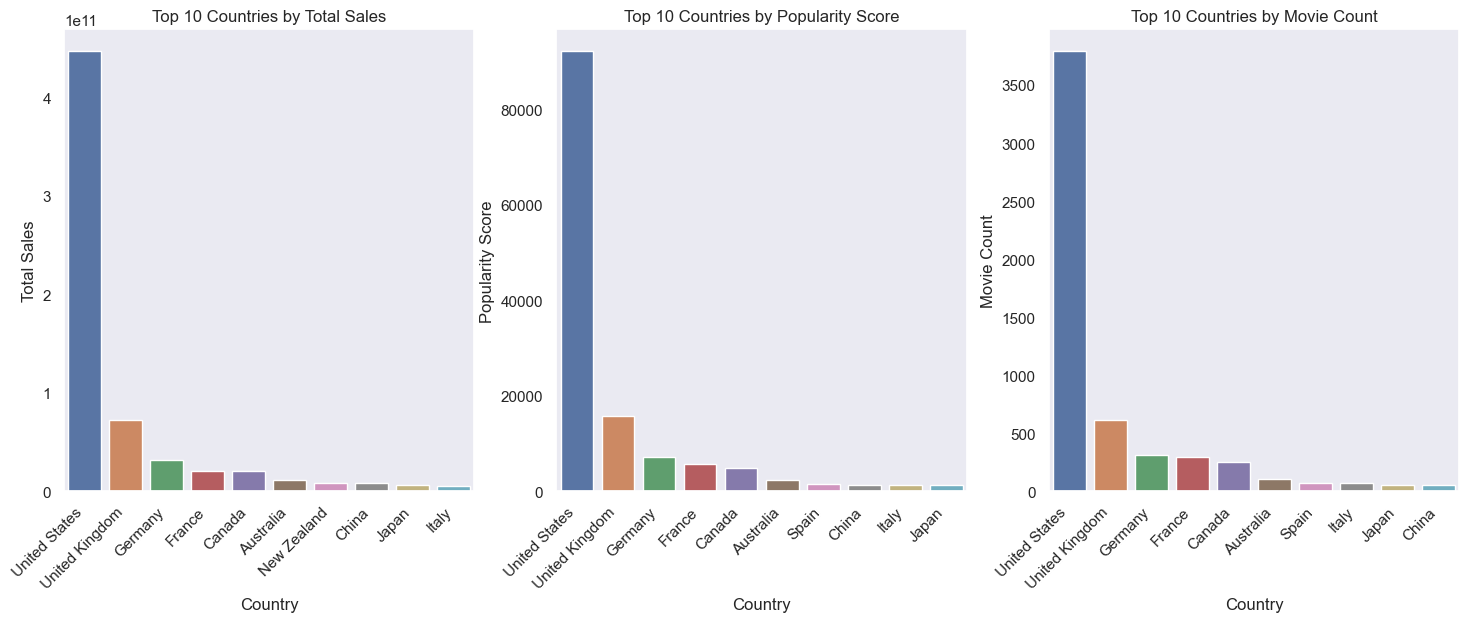

In [149]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot total_sales
sns.barplot(x=countries_total_sales.index, y=countries_total_sales.values, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Sales')
axes[0].set_title('Top 10 Countries by Total Sales')

# Plot popularity_score
sns.barplot(x=countries_popularity_score.index, y=countries_popularity_score.values, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Popularity Score')
axes[1].set_title('Top 10 Countries by Popularity Score')

# Plot movie_count
sns.barplot(x=countries_movie_count.index, y=countries_movie_count.values, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('Movie Count')
axes[2].set_title('Top 10 Countries by Movie Count');



### 13. According to the budget, classify the films into three categories: high cost, low cost and medium

Since we lack real-world data to categorize the budgets of movies accurately, as they depend on the economic conditions of the release year  
and the opinions of **economists** and **experts in the film industry**, It is not possible to make a **correct** and **accurate** analysis

In [119]:
# budget_Q1 = int(df['budget'].quantile(0.25))
# budget_Q3 = int(df['budget'].quantile(0.75))

# budget_bins = [0, budget_Q1, budget_Q3, float('inf')]
# budget_labels = ['low', 'medium', 'high']

# df['cost'] = pd.cut(df.budget , bins= budget_bins , labels= budget_labels ,right=False)

In [120]:
budget_scaled = scale.fit_transform(df[['budget']]).reshape(-1)

bins = [0, 0.33, 0.66, 1]
labels = ['low', 'medium', 'high']

df['cost'] = pd.cut(budget_scaled, bins=bins, labels=labels)

In [121]:
df['cost'].value_counts()

low       4001
medium     333
high        85
Name: cost, dtype: int64

### 14. Draw a cost-popularity chart and color each point in this chart based on its price category (high-cost, low-cost, and average).

I tried different plots, and the best result was achieved with the line plot.

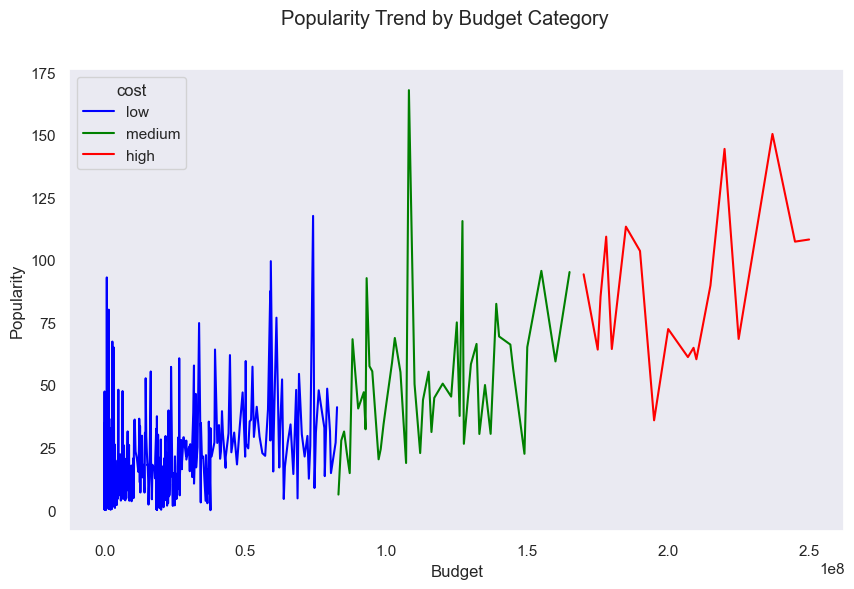

In [122]:

fig , ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='budget', y='popularity', hue='cost',
             ax=ax , palette={'low': 'blue', 'medium': 'green', 'high': 'red'},errorbar=None)

plt.suptitle('Popularity Trend by Budget Category')
ax.set_xlabel('Budget')
ax.set_ylabel('Popularity');

### 15. Are high-budget movies more popular than others? 

In [123]:
compare_budget_df =df[['cost','popularity','budget']].copy()

In [124]:
compare_budget_df['popularity'] = scale.fit_transform(compare_budget_df[['popularity']].values)
compare_budget_df['high_budget'] = compare_budget_df['cost'].apply(lambda cost : 1 if cost == 'high' else 0)

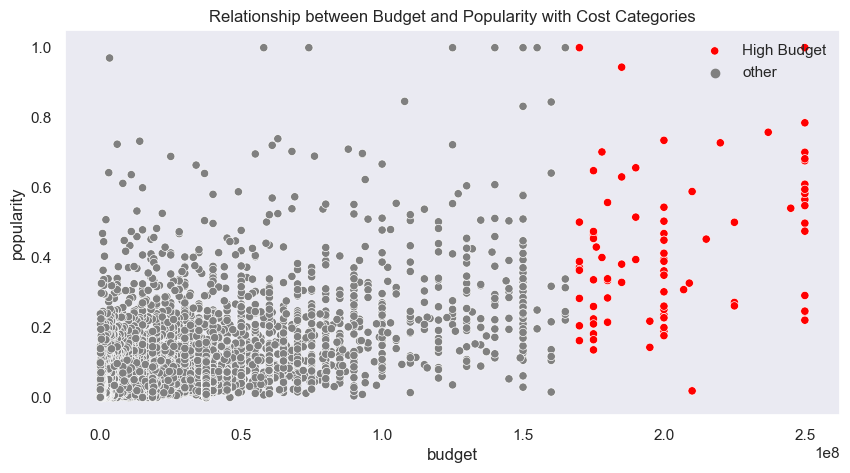

In [125]:
fig, ax = plt.subplots(figsize=(10, 5))

custom_palette = {0 : 'gray' ,  1 :'red'}
sns.scatterplot(compare_budget_df , x='budget', y='popularity', hue='high_budget' , palette=custom_palette)
ax.legend(labels=['High Budget' , 'other'], framealpha=0, loc='upper right')
ax.set_title('Relationship between Budget and Popularity with Cost Categories');

Based on the upper figure, this issue cannot be **strongly** confirmed high-budget movies more popular than others

In [126]:
budgets = compare_budget_df.groupby('high_budget')['popularity'].mean()

print(f"Average popularity of high budget movies: {budgets[1]}")
print(f"Average popularity of other budget movies: {budgets[0]}")

Average popularity of high budget movies: 0.4274011684498457
Average popularity of other budget movies: 0.10818476353035547


If we consider the **average popularity** as the criterion, we can conclude that high-budget movies are more popular than others.

In [127]:
# import scipy.stats as stats

# high_budget_movies = compare_budget_df[compare_budget_df['high_budget'] == 1]['popularity']
# other_movies = compare_budget_df[compare_budget_df['high_budget'] == 0]['popularity']

# t_stat, p_value = stats.ttest_ind(high_budget_movies, other_movies, equal_var=False)

# alpha = 0.05

# print(f"T-statistic: {t_stat}")
# print(f"P-value: {p_value}")

# if p_value < alpha:
#     print("There is a significant difference in popularity between high-budget movies and other movies.")
# else:
#     print("There is no significant difference in popularity between high-budget movies and other movies.")


T-statistic: 13.84040869360072
P-value: 1.7252980347886022e-23
There is a significant difference in popularity between high-budget movies and other movies.


### 16. Is there a correlation between cost and popularity? Are high-budget movies more popular than others?

If we consider the cost as the budget of movies.

the correlation between budget and popularity is 0.5155171730150369 so this is not a concrete correlation.
And the answer is No.


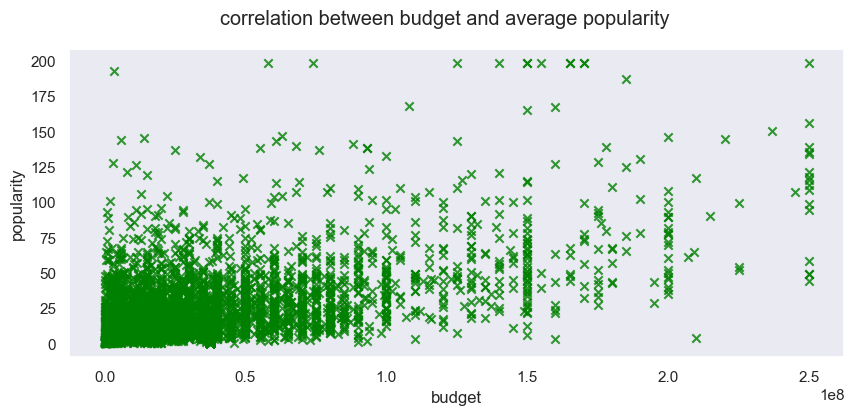

In [128]:
print(f"the correlation between budget and popularity is {df.corr().loc['budget','popularity']} so this is not a concrete correlation.")
print("And the answer is No.")

fig , ax = plt.subplots(figsize = (10,4))
sns.regplot(df , x= 'budget', y='popularity' , color='green' , marker='x' , fit_reg=False);
plt.suptitle('correlation between budget and average popularity');

### 17. Calculate the average popularity of each director's films

In [129]:
avg_popularity_by_director = df.groupby('director')['popularity'].mean().sort_index()

most_populare_directors = avg_popularity_by_director.sort_values(ascending=False).head(15)

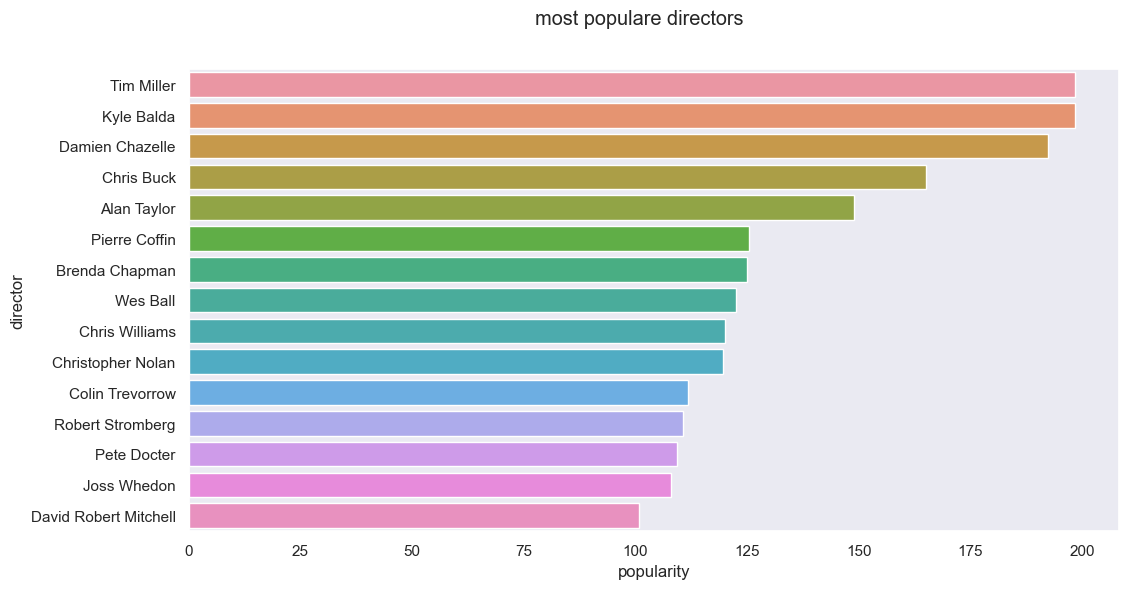

In [130]:
fig , ax = plt.subplots(figsize =  (12,6))

sns.barplot( x=most_populare_directors.values , y = most_populare_directors.index)

plt.suptitle('most populare directors')
ax.set_xlabel('popularity');

### 18. Calculate the number of films made by each director.  Is there a relationship between the number of films made by directors and the popularity of films?

In [131]:
director_films_count = df['director'].value_counts().sort_index()
director_df = pd.merge(director_films_count,avg_popularity_by_director
            ,right_index=True,left_index=True).reset_index().rename(
            columns={'director':'films_count','index':'director'}).sort_values(by='films_count',ascending=False)

In [132]:
director_df.to_csv('./data/directors.csv')

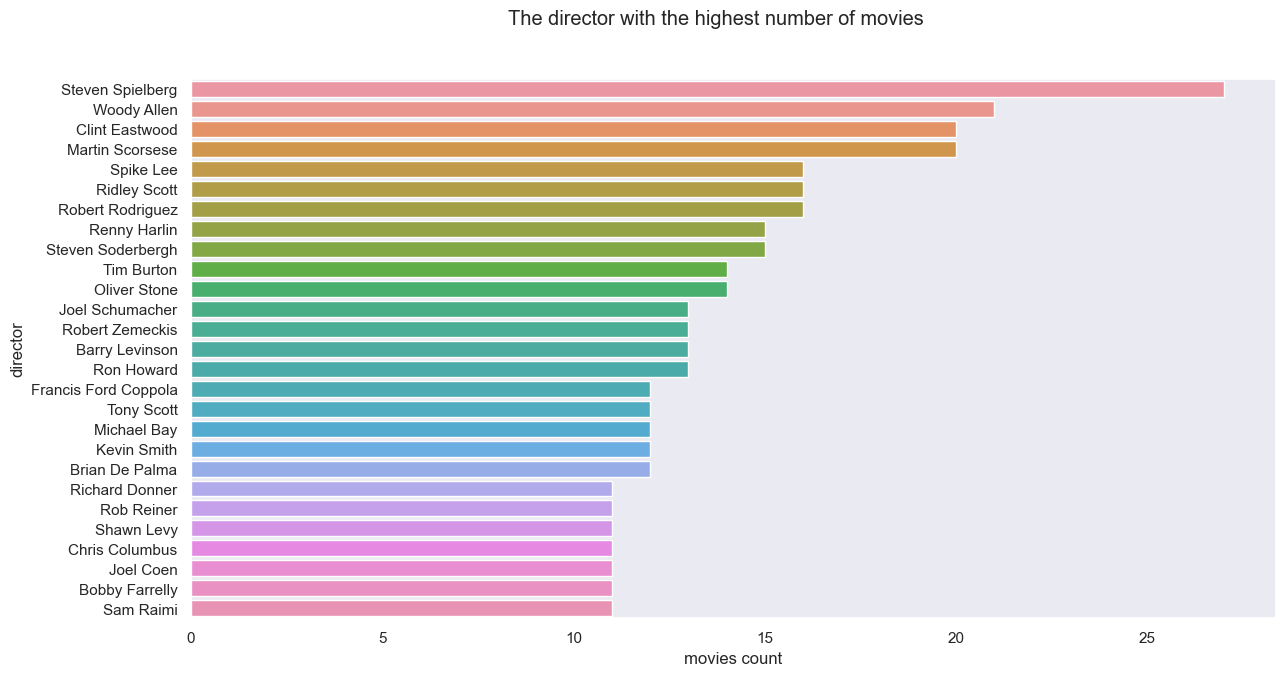

In [133]:
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(director_df.head(27),x='films_count',y='director')

plt.suptitle('The director with the highest number of movies')
ax.set_xlabel('movies count');

The correlation between count and popularity of movie directors is 0.2821073077709129


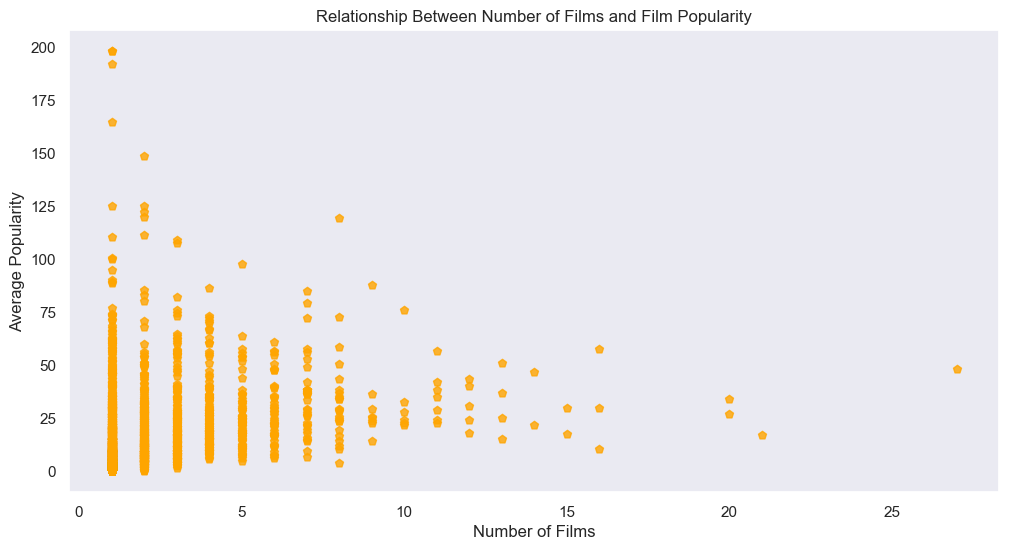

In [134]:
print(f"The correlation between count and popularity of movie directors is {director_df.corr().loc['films_count', 'popularity']}")

fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(data=director_df , x='films_count', y='popularity', fit_reg=False , marker='p' ,color='orange')
ax.set_xlabel('Number of Films')
ax.set_ylabel('Average Popularity')
ax.set_title('Relationship Between Number of Films and Film Popularity');

### 19. Calculate the popularity gain of each company's films and find the most popular film production company

For fair scoring, especially for companies with high turnover, we use a combination of the total popularity achieved by the movies and their average. This approach helps provide a balanced assessment and takes into account both the overall popularity of the movies and their consistency in performance.

In [135]:
companies_movies_df = df.explode('companies')[['popularity','companies']]

companies_df = pd.DataFrame()
companies_df['total_popularity'] = companies_movies_df.groupby('companies')['popularity'].sum().sort_index()
companies_df['average_popularity'] = companies_movies_df.groupby('companies')['popularity'].mean().sort_index()
companies_df['movies count'] = companies_movies_df.groupby('companies').size()
companies_df.reset_index(inplace=True)

check number of movies built by each company

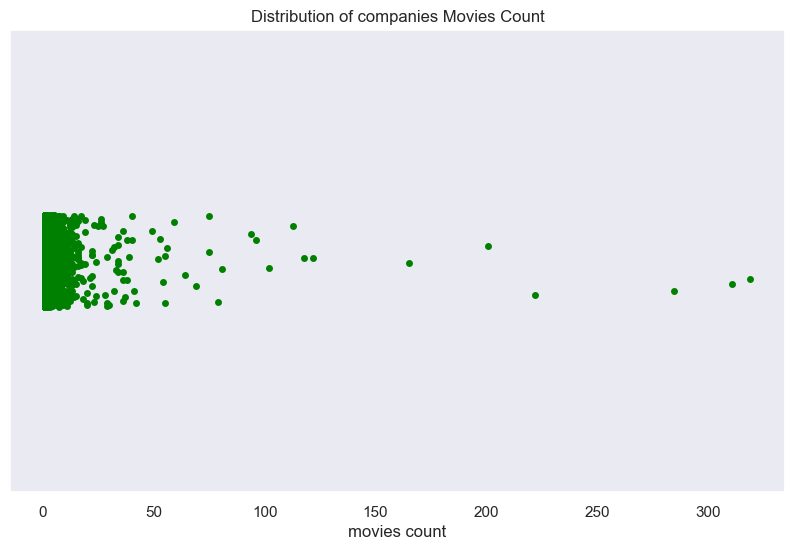

In [136]:
fig , ax =plt.subplots(figsize=(10, 6))
sns.stripplot(data=companies_df, x='movies count', color='green')

plt.title('Distribution of companies Movies Count');


For the purpose of this question, we need to eliminate companies having fewer than 3 movies.

In [137]:
companies_df = companies_df[companies_df['movies count']>3]

The correlation between total popularity and average popularity is 0.20819794357635646.
Thus, while there is not a concrete correlation, we consider giving more weight 
to total popularity as turnover is more important to us under these conditions.


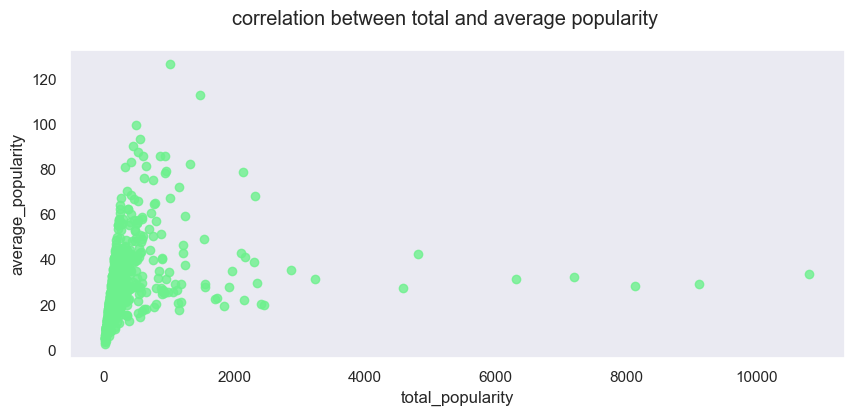

In [138]:
print(f'''The correlation between total popularity and average popularity is {companies_df.corr().loc['total_popularity', 'average_popularity']}.
Thus, while there is not a concrete correlation, we consider giving more weight 
to total popularity as turnover is more important to us under these conditions.''')

fig , ax = plt.subplots(figsize = (10,4))
sns.regplot(companies_df , x= 'total_popularity',y='average_popularity',fit_reg=False ,color=generate_random_color());
plt.suptitle('correlation between total and average popularity');

In [139]:
companies_df['total_popularity'] = scale.fit_transform(companies_df[['total_popularity']]) *10
companies_df['average_popularity'] = scale.fit_transform(companies_df[['average_popularity']])*10

companies_df['score'] = (.7 * companies_df.total_popularity) + (.3 * companies_df.average_popularity)
companies_df = companies_df.sort_values(by='score' , ascending= False).head(10).reset_index()

In [140]:
companies_df.head()

index                               companies  total_popularity  \
0   4794                            Warner Bros.         10.000000   
1   4649                      Universal Pictures          8.431562   
2   3334                      Paramount Pictures          7.523862   
3   4587  Twentieth Century Fox Film Corporation          6.660021   
4    967                       Columbia Pictures          5.841354   

   average_popularity  movies count     score  
0            2.508060           319  7.752418  
1            2.139336           311  6.543894  
2            2.077755           285  5.890030  
3            2.392437           222  5.379746  
4            2.311316           201  4.782342

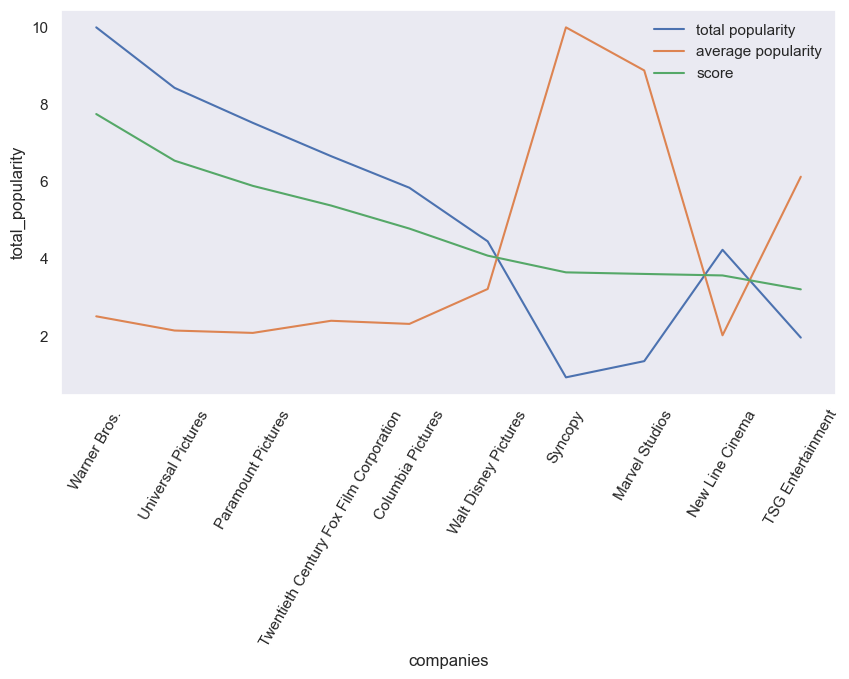

In [141]:
fig , ax = plt.subplots(figsize= (10,5))

sns.lineplot(companies_df , x= 'companies' , y = 'total_popularity',label = 'total popularity')
sns.lineplot(companies_df , x= 'companies' , y = 'average_popularity',label = 'average popularity')
sns.lineplot(companies_df , x= 'companies' , y = 'score',label = 'score')

ax.legend(loc='upper right', framealpha=0)


plt.xticks(rotation=60);

### 20. Calculate the average duration of each director's films. Which director makes the longest films?

In [142]:
director_avg_runtime = df.groupby('director')['runtime'].mean().sort_values(ascending=False)

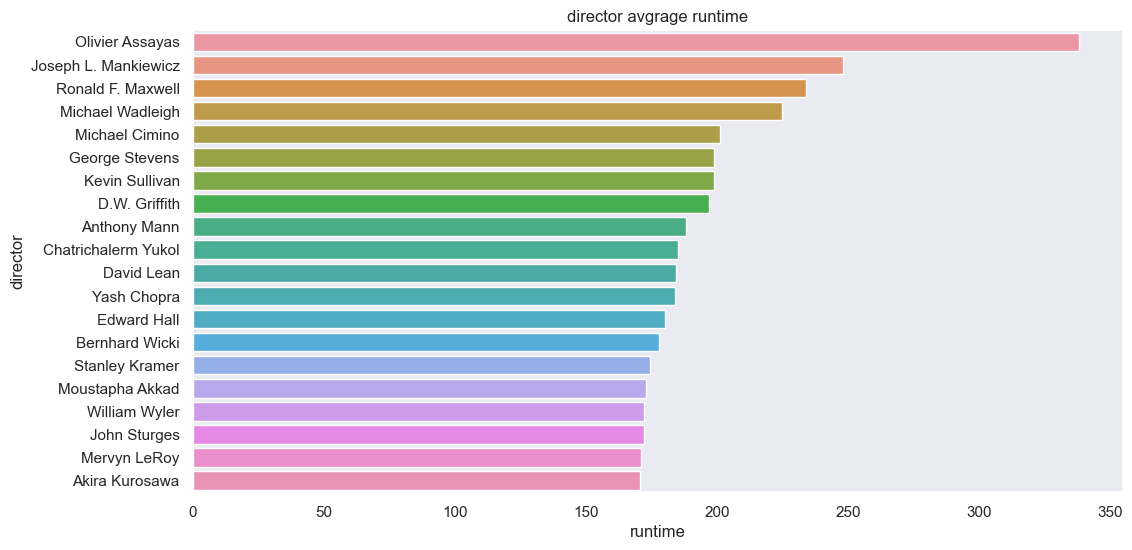

In [150]:
fig, ax = plt.subplots(figsize=(12, 6))
to_draw= director_avg_runtime[:20]
sns.barplot(y=to_draw.index , x=to_draw.values , ax=ax)
ax.set_xlabel('runtime')
ax.set_title('director avgrage runtime');
